<center>
  <h3><b>===== DAC IFest Unpad 2023 ======</b></h3>
</center> <br>

- **Abdi Negara Guci** <br>
Departement of Mathematics,
Faculty of Mathematics and Natural Science
Brawijaya University
Malang city, Indonesia
abdinegara783@gmail.com
<br> <br>
- **Dian Alhusari** <br>
Departement of Mathematics,
Faculty of Mathematics and Natural Science
Brawijaya University
Malang city, Indonesia
alhusari2@gmail.com
<br> <br>
- **Safrizal Ardana Ardiyansa** <br>
Departement of Mathematics,
Faculty of Mathematics and Natural Science
Brawijaya University
Malang city, Indonesia
superfans575@gmail.com
<br> <br>
- **Jemmy Febryan** <br>
Departement of Mathematics,
Faculty of Mathematics and Natural Science
Brawijaya University
Malang city, Indonesia
danieljemmyfebryan@gmail.com



# 1. Data Preparing

## a. Menyiapkan Library dan Dataset

In [ ]:
import re
import numpy as np
import pandas as pd
import string

from IPython.display import display, HTML

In [ ]:
# Menyambungkan google drive ke colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Mengimport dataset
dataset_path = '/content/drive/MyDrive/IFEST/Dataset Babak Penyisihan.csv'

# Membaca dataset
df = pd.read_csv(dataset_path)

## b. Preprocessing Missing Value dan Duplikat

In [ ]:
# Menghapus baris dengan nilai null pada kolom 'tweet'
df = df.dropna(subset=['tweet'])

# Menghapus baris dengan nilai duplikat
df = df.drop_duplicates()

In [ ]:
# Get the indexes of the rows to be dropped
error_index = df[df['tweet'] == '#ERROR!'].index

# Drop the rows from the DataFrame
df = df.drop(error_index)

In [ ]:
# Reset index dari dataframe
df = df.reset_index(drop=True)

# Mengubah kolom label menjadi kategori
df['label'] = df['label'].astype('category')

In [ ]:
df.to_csv('df_ifest.csv', index=None)

## c. Memahami Dataset

In [ ]:
# Menentukan lebar untuk setiap kolom
label_width = 10
tweet_width = 3000

# Menampilkan data untuk 500 baris pertama
for i in range(500):
    try:
        label = df['label'][i].ljust(label_width)
        tweet = df['tweet'][i].ljust(tweet_width)
        print(f"{i} {label} {tweet}")
    except Exception as e:
        print(df['label'][i], df['tweet'][i])

0 fear       Lebih menyeramkan kalo punya grup WA keluarga yg isinya sharing2 hadist & ayat Al-Qur'an DAN grup WA lingkungan paroki gereja.... Serem kalo salah reply                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [ ]:
# Info about dataset
display(HTML("<h4><pre>        Deskripsi Dataset</pre></h4>"))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5036 entries, 0 to 5035
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   label   4052 non-null   category
 1   tweet   5036 non-null   object  
dtypes: category(1), object(1)
memory usage: 44.6+ KB


In [ ]:
# Menghitung frekuensi setiap label
display(HTML("<h4>Label dari Dataset</h4>"))
value_counts = df['label'].value_counts()
print(value_counts)

sadness    1075
joy         997
anger       842
fear        650
love        488
Name: label, dtype: int64


In [ ]:
# Count number of missing value
num_missing = df.isnull().sum().sum()
print("Number of rows with missing values:", num_missing)

Number of rows with missing values: 984


In [ ]:
# Mencari baris yang memiliki nilai null
rows_with_null = df[df.isnull().any(axis=1)]

# Menampilkan baris yang memiliki nilai null
rows_with_null.head(20)

,label,tweet
4052,NaN,Saya taKan raguKan besarNya kasih sayang Tuhan...
4053,NaN,Cc in ke cebong2 dungu... Maksd hati pengen ca...
4054,NaN,"Nah, yg keterlaluan adl kalo ada pjbt eselon y..."
4055,NaN,Melody masih membatasi diri ala member ya? Yan...
4056,NaN,Rasa amarah ini membuatku merasa seperti aku a...
4057,NaN,Terima kasih mommy Jesica atas kepercayaan kep...
4058,NaN,"Eh pas seminggu nunggu, pak tiki ngga sampe2 d..."
4059,NaN,"Sekali , dua kali , tiga kali , lama2 bosan ju..."
4060,NaN,Semoga Tuhan senantiasa menyertai setiap langk...
4061,NaN,Tenganan Festival menjadi festival pariwisata ...


In [ ]:
# Inisialisasi set kosong untuk menyimpan tanda baca
unique_punctuation = set()
unique_emoticons = set()

for i in range(df.shape[0]):
    tweet = df['tweet'][i]
    punctuation = re.findall(r'[!\"#$%&\'()*+,-./:;<=>?@[\]^_`{|}~]+(?:\s*[!\"#$%&\'()*+,-./:;<=>?@[\]^_`{|}~]+)*', tweet)

    # Menggunakan regex untuk mencocokkan emotikon
    emoticons = re.findall(r'[^\w\s]', tweet)
    unique_emoticons.update(emoticons)
    unique_punctuation.update(punctuation)

In [ ]:
for punctuation in unique_punctuation:
    print(punctuation)

-
! *****
* #
:') [
.....
... "
.. .
._____.
:(
. . . . . . . . . . . . . . . . . . .
... ::
'
.' '
.. "
)))
+
", "
. ***
-!
. :))
( *
? *
)?"
...!!!
+.
! :
!:
))
~
'. [
' #
,..
..!!!
!! [
. . . . . #
-/-
......................
.. :: :: #
, ....
." "....
) (@
] @
, (
?",
:.........
. -
:')
.!
://
. : *
. . . .
, ?"
^
,
( =
:((((
!!"
: (
:]
. --
.. -
.........." "
:( #
... **
. &
!
??..
???????
:/
" *
,-- [
, #
....!!
+ [
" ,
..." *
] ?
~~
:[
..' '
(((
:""""""""""""
! [
]
?!"
:''''''''')
" - "
] ( [
...@
." "
(.....)
..
] ,
" /
" :)
] @_
!!! [
. @
...(
.... [
:),
: "
.!!!
' .
!!!!!!!!!!!
:/-
.@
? -.-
] .... [
. ~
!!! #
) !!
.. . .
* *
++
. "
'.#
, [
] :
. . #
] ! [
:)) [
,,,,
<
] :')
] . . . . . . #
* :
???? [
]: [
] [
:*
.'
...??
] :)) [
',
---
-&
--"
???
!!!!
:''(
. . .
::
????
?' --
: [
] #
?! [
]#
,"
). . .
.#
] --
.../
?", "
:(((((
:).
!!!]
.....??
? "
, '
" #
] &
..'
/
* [
.. :)
?.
>_<
... *
] & [
! -_-
! #
?!!!!!!!!!!!!!!!
*...
:))
. ..
,,,
??,
...
!!!! !! ! ! ! ! ! ! !
..." [
] 

In [ ]:
for emoticons in unique_emoticons:
    print(emoticons)

-
{
🏞
🌌
🌋
⌛
🌞
🌿
@
🎉
💞
😢
✈
👧
🕷
🌠
'
🤕
💤
👊
🎤
🌹
👏
🚶
📚
+
🦸
🌉
🌲
🤩
☀
🌙
🙃
🌟
🧩
😱
🚀
🤓
"
🔦
️
🩸
🐱
🧠
🌎
🌀
💖
🚫
😃
😡
⚡
🔴
/
⛅
💧
🕵
🎮
🌺
🎶
🍃
🍂
🌼
🤣
🔪
🌪
🍳
🌊
🎭
🌑
☠
😄
~
🍽
🔍
😨
🥰
⛰
😰
💗
}
🦄
👵
👀
🚴
💢
🏠
❤
🙌
🤯
&
‍
🔄
👾
📱
⏲
$
💡
^
,
🏆
⚔
🔑
💓
🧘
👻
😤
🍲
🌅
[
⛔
😫
!
🧱
♀
💻
✔
🤗
🎨
📅
%
🕳
🤝
💕
👩
👨
💔
💫
🌬
📽
`
🗨
😠
🌷
🎬
👂
♂
❓
]
🐶
🌱
)
📉
🎖
⏳
😞
💃
📖
🎈
📸
📢
🙏
🤸
🔮
👴
🏃
🕰
🌃
🎂
🏡
✨
💼
\
🍕
🕯
❣
👦
🔥
💥
👤
👣
👥
🎓
🌸
*
👶
💑
😔
👹
🏖
👫
🎊
(
🏅
📣
🏋
🛤
☔
.
🎁
💬
<
🎵
🔒
🌆
🌍
🗣
🔊
🌓
👁
⛈
🔇
>
🌳
🌄
=
🌫
💭
?
🌈
😊
🏁
:
😂
💪
#
💌
🌥
🌦


# 2. Data Preprocessing

## a. Ganti Emoticon Menjadi Teks

In [ ]:
df_emoji = pd.read_csv('drive/MyDrive/IFEST/emot_indo2.csv')
print(df_emoji.head(5))

  emoji        makna
0     😀  kebahagiaan
1     😃  kebahagiaan
2     😄  kebahagiaan
3     😁  kebahagiaan
4     😆         tawa


In [ ]:
df_tweet = df.drop(columns='label').copy()
df_tweet.head()

,tweet
0,Lebih menyeramkan kalo punya grup WA keluarga ...
1,"Hepibesdey canteeeekk [USERNAME] panjang umur,..."
2,Jumat lalu nonton inih! Selain tertarik settin...
3,Nyante dulu.. Sruput kopi biar tambah bijak...
4,Happy annyversarry yg pertama kalinya .. Trsra...


In [ ]:
!pip install emoji


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 4.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import emoji


# Fungsi untuk mengecek apakah teks mengandung emotikon
def contains_emoticon(text):
    emoticon_pattern = re.compile(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF]')
    return bool(emoticon_pattern.search(text))

# Menambahkan kolom baru 'contains_emoticon'
df_tweet['contains_emoticon'] = df_tweet['tweet'].apply(contains_emoticon)

# Menampilkan baris yang mengandung emotikon
baris_dengan_emot = df_tweet[df_tweet['contains_emoticon']]

baris_dengan_emot

,tweet,contains_emoticon
19,Momen di mana kamu merasa seperti semua yang k...,True
42,Momen di mana kamu merasa seperti amarahmu mer...,True
43,Momen di mana kamu merasa seperti kamu hanya b...,True
49,Ketika lagu-lagu yang dulu membawa kebahagiaan...,True
67,Saat-saat ketika kamu membagikan cerita lucu a...,True
...,...,...
4985,Ketika kamu merasa frustrasi dan marah karena ...,True
5002,Ketika kamu merasa begitu marah sehingga kamu ...,True
5014,Ketika kamu merasa seperti kamu terjebak dalam...,True
5016,Ketika rasa marah membuatmu merasa seperti kam...,True


In [ ]:
import pandas as pd
import re

# Membaca data CSV
data_emoji = df_emoji
data_tweet = baris_dengan_emot

# Membuat kamus untuk memetakan emotikon ke makna
emoji_to_meaning = {}
for index, row in data_emoji.iterrows():
    emoji_to_meaning[row['emoji']] = row['makna']

# Fungsi untuk mendapatkan makna dari emotikon
def get_meaning(emoji_char):
    return emoji_to_meaning.get(emoji_char, "")

# Mengganti kata dalam tweet yang mengandung emotikon dengan makna emotikon
for index, row in data_tweet.iterrows():
    if row['contains_emoticon']:
        tweet = row['tweet']
        emoticons = re.findall(r'[^\w\s]', tweet)
        meanings = [get_meaning(emoji_char) for emoji_char in emoticons]
        for emoji_char, meaning in zip(emoticons, meanings):
            if meaning:
                # Mencari posisi emoji dalam tweet
                pos = tweet.find(emoji_char)
                # Memeriksa apakah emoji diberikan spasi di depan
                if pos > 0 and tweet[pos - 1] != ' ':
                    meaning = ' ' + meaning
                # Memeriksa apakah emoji diberikan spasi di belakang
                if pos + len(emoji_char) < len(tweet) and tweet[pos + len(emoji_char)] != ' ':
                    meaning = meaning + ' '
                tweet = tweet.replace(emoji_char, meaning)
        data_tweet.at[index, 'tweet'] = tweet

data_tweet = data_tweet.drop(columns=['contains_emoticon'])
data_tweet


,tweet
19,Momen di mana kamu merasa seperti semua yang kamu inginkan adalah meluapkan kemarahanmu tanpa ampun. frustrasi marah #UnleashTheAnger
42,Momen di mana kamu merasa seperti amarahmu meresap ke dalam dirimu seperti racun. marah frustrasi #ToxicAnger
43,Momen di mana kamu merasa seperti kamu hanya bisa merenungkan tentang semua yang telah hilang dalam hidupmu. Balon berpikir patah hati #Losses
49,Ketika lagu-lagu yang dulu membawa kebahagiaan sekarang hanya mengingatkan pada masa-masa yang sulit. not musik menangis #MelancholicTunes
67,Saat-saat ketika kamu membagikan cerita lucu atau pengalaman lucu dan mengundang tawa dari orang lain. tertawa megafon #HumorSharing
...,...
4985,Ketika kamu merasa frustrasi dan marah karena situasi yang tak kunjung membaik. kegembiraan membenci #Frustration
5002,Ketika kamu merasa begitu marah sehingga kamu hampir merasa sakit fisik. membenci cedera #PhysicallyHurting
5014,Ketika kamu merasa seperti kamu terjebak dalam pusaran rasa takut yang sulit untuk melawan. topan kegembiraan #WhirlpoolOfFear
5016,Ketika rasa marah membuatmu merasa seperti kamu bisa memutar ulang waktu dengan amukanmu. jam pengatur waktu ️ membenci #TimeWarper


In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
# Mengganti baris di data_train dengan data_tweet berdasarkan indeks
df_tweet_noemot = df_tweet.copy()
for index, row in data_tweet.iterrows():
    df_tweet_noemot.loc[index] = row
df_tweet_noemot = df_tweet_noemot.drop(columns=['contains_emoticon'])
df_tweet_noemot.head(20)

,tweet
0,Lebih menyeramkan kalo punya grup WA keluarga yg isinya sharing2 hadist & ayat Al-Qur'an DAN grup WA lingkungan paroki gereja.... Serem kalo salah reply
1,"Hepibesdey canteeeekk [USERNAME] panjang umur, jadi pribadi yang jauh lebih baik, semoga apa yang di cita-citakan terwujud dan langgeng sama [USERNAME]"
2,"Jumat lalu nonton inih! Selain tertarik settingnya yg di Jogja, aku penasaran stlh baca bahaya laten acak2 rambut di review Kak [USERNAME] Dan emang bagus banget! Mata sembab gak karuan. Nonton yuk mumpung masih tayang."
3,Nyante dulu.. Sruput kopi biar tambah bijak...
4,"Happy annyversarry yg pertama kalinya .. Trsrah org mau blng apa, aku gk pdli.. Ini yg aku rasain slma 1blan.. Aku cukup bhagia sm km smuanya baik"" aja, jgn ada mslh yy sayang, cemburu krna org lain wajarkan.. Dan smg kita juga makin mngrti satu sama lain."
5,"beli kaos banyak dengan ukuran yg udah downgrade, kucariin kok ngga ada ternyata masuk ke lemari Bapak, mbak ART ku kayaknya ga notice aku udah kurusan."
6,"Pada saat kamu menangis merengek meminta boneka atau mainan baru, mama menatapmu iba. Tetapi papa akan mengatakan dengan tegas : ""boleh, kita beli nanti, tapi tidak sekarang"""
7,"[USERNAME] tolong aplikasinya diberesin. Saya tadi pesan, katanya server error. Eh muncul 4 taksi. Khan kasian drivernya, saya musti cancel."
8,"Percaya kata lelaki itu, terutama ketika aku ingin mati karena disiksa zaman. Tapi karena kematian tak kunjung tiba, aku melupakanNya. Tuhan menjauh, dan aku pun menjauhiNya. Aku tidak tahu, apa iya masih penting sejak kulupa."
9,ada saatnya sakit hati itu kita nikmatin dengan cara kita. menangis salah satunya. gembira pun bisa jadi alternatif lain. yang terpenting semua itu bisa kita lewatin walaupun gagal.


## b. Ganti Kata Tidak Baku dengan KAMUSALAY

In [ ]:
df_kamusalay = pd.read_csv('/content/drive/MyDrive/IFEST/new_kamusalay.csv', encoding='iso-8859-1', header=None)
df_kamusalay.head()

,0,1
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali


In [ ]:
"cek" in "aku ada di cgk"

False

In [ ]:
iter = 0
def correct_sentence(sentence, corrections_df):
    global iter
    for index, row in corrections_df.iterrows():
        typo = row[0]
        if typo not in sentence:
            continue
        corrected = row[1]
        sentence = re.sub(r'\b' + typo + r'\b', corrected, sentence, flags=re.IGNORECASE)
    iter += 1
    if iter%100 == 0:
        print("Data yang sudah diproses : " + str(iter) + "/" + "5036")
    return sentence

df_tweet_kamusalay = df_tweet_noemot.copy()
df_tweet_kamusalay = df_tweet_kamusalay.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df_tweet_kamusalay['tweet_kamusalay'] = df_tweet_kamusalay['tweet'].apply(lambda x: correct_sentence(x, df_kamusalay))

Data yang sudah diproses : 100/5036
Data yang sudah diproses : 200/5036
Data yang sudah diproses : 300/5036
Data yang sudah diproses : 400/5036
Data yang sudah diproses : 500/5036
Data yang sudah diproses : 600/5036
Data yang sudah diproses : 700/5036
Data yang sudah diproses : 800/5036
Data yang sudah diproses : 900/5036
Data yang sudah diproses : 1000/5036
Data yang sudah diproses : 1100/5036
Data yang sudah diproses : 1200/5036
Data yang sudah diproses : 1300/5036
Data yang sudah diproses : 1400/5036
Data yang sudah diproses : 1500/5036
Data yang sudah diproses : 1600/5036
Data yang sudah diproses : 1700/5036
Data yang sudah diproses : 1800/5036
Data yang sudah diproses : 1900/5036
Data yang sudah diproses : 2000/5036
Data yang sudah diproses : 2100/5036
Data yang sudah diproses : 2200/5036
Data yang sudah diproses : 2300/5036
Data yang sudah diproses : 2400/5036
Data yang sudah diproses : 2500/5036
Data yang sudah diproses : 2600/5036
Data yang sudah diproses : 2700/5036
Data yang 

In [ ]:
df_tweet_kamusalay.head()

,tweet,tweet_kamusalay
0,lebih menyeramkan kalo punya grup wa keluarga yg isinya sharing2 hadist & ayat al-qur'an dan grup wa lingkungan paroki gereja.... serem kalo salah reply,lebih menyeramkan kalau punya grup wa keluarga yang isinya sharing2 hadis & ayat al-qur'an dan grup wa lingkungan paroki gereja.... seram kalau salah reply
1,"hepibesdey canteeeekk [username] panjang umur, jadi pribadi yang jauh lebih baik, semoga apa yang di cita-citakan terwujud dan langgeng sama [username]","hepibesdey canteeeekk [nama pengguna] panjang umur, jadi pribadi yang jauh lebih baik, semoga apa yang di cita-citakan terwujud dan langgeng sama [nama pengguna]"
2,"jumat lalu nonton inih! selain tertarik settingnya yg di jogja, aku penasaran stlh baca bahaya laten acak2 rambut di review kak [username] dan emang bagus banget! mata sembab gak karuan. nonton yuk mumpung masih tayang.","jumat lalu menonton ini! selain tertarik settingnya yang di yoyakarta, aku penasaran setelah baca bahaya laten acak2 rambut di review kak [nama pengguna] dan memang bagus banget! mata sembab tidak karuan. menonton yuk mumpung masih tayang."
3,nyante dulu.. sruput kopi biar tambah bijak...,nyante dulu.. seruput kopi biar tambah bijak...
4,"happy annyversarry yg pertama kalinya .. trsrah org mau blng apa, aku gk pdli.. ini yg aku rasain slma 1blan.. aku cukup bhagia sm km smuanya baik"" aja, jgn ada mslh yy sayang, cemburu krna org lain wajarkan.. dan smg kita juga makin mngrti satu sama lain.","happy annyversarry yang pertama kalinya .. trsrah orang mau bilang apa, aku tidak pdli.. ini yang aku rasakan selama 1blan.. aku cukup bahagia sama km semuanya baik"" saja, jangan ada masalah iya iya sayang, cemburu karena orang lain wajarkan.. dan semoga kita juga makin mngrti satu sama lain."


In [ ]:
df_tweet_kamusalay.to_csv('data_kamusalay_noemot.csv')

In [ ]:
df_tweet_kamusalay = pd.read_csv('/content/data_kamusalay_noemot.csv').drop(columns='Unnamed: 0')
df_tweet_kamusalay.head()

,tweet,tweet_kamusalay
0,lebih menyeramkan kalo punya grup wa keluarga ...,lebih menyeramkan kalau punya grup wa keluarga...
1,"hepibesdey canteeeekk [username] panjang umur,...",hepibesdey canteeeekk [nama pengguna] panjang ...
2,jumat lalu nonton inih! selain tertarik settin...,jumat lalu menonton ini! selain tertarik setti...
3,nyante dulu.. sruput kopi biar tambah bijak...,nyante dulu.. seruput kopi biar tambah bijak...
4,happy annyversarry yg pertama kalinya .. trsra...,happy annyversarry yang pertama kalinya .. trs...


## c. Ganti Emot Karakter dengan Sentiment

In [ ]:
df_emotkarakter = pd.read_csv('drive/MyDrive/IFEST/dataset_emot_karakter.csv').astype(str)
df_emotkarakter.head()

,emot,arti
0,:(,sedih
1,:*,cium
2,:),senyum
3,:],senyum
4,:[,sedih


In [ ]:
df_emotkarakter.iloc[42]

emot         =_=
arti    frustasi
Name: 42, dtype: object

In [ ]:
def remove_consecutive_duplicate_punctuation(text):
    # Use regular expression to remove consecutive duplicate punctuation marks and underscores
    cleaned_text = re.sub(r'([^\w\s]|_)\1+', r'\1', text)
    return cleaned_text

In [ ]:
df_noemotkarakter = df_tweet_kamusalay.copy()
df_noemotkarakter = df_noemotkarakter.drop(columns='tweet')
df_noemotkarakter['tweet_kamusalay'] = df_noemotkarakter['tweet_kamusalay'].apply(remove_consecutive_duplicate_punctuation)
df_noemotkarakter.iloc[40:80]

,tweet_kamusalay
40,"omelette mie ter-pas banget, texturenya pas, t..."
41,sudah 26hari i menangis terus tiap hari.mata t...
42,momen di mana kamu merasa seperti amarahmu mer...
43,momen di mana kamu merasa seperti kamu hanya b...
44,yang penting tidak-ngejer2 cowok orang iya pad...
45,persibku menang lagi . persibku menang lagi . ...
46,"entah tak tau kenapa, semakin bertambahnya umu..."
47,beberapa hari yang lalu foto aku di posting sa...
48,1bln dua kali putus berapa lama memang kamu ja...
49,ketika lagu-lagu yang dulu membawa kebahagiaan...


In [ ]:
df_noemotkarakter.head()

,tweet_kamusalay
0,lebih menyeramkan kalau punya grup wa keluarga...
1,hepibesdey canteeeekk [nama pengguna] panjang ...
2,jumat lalu menonton ini! selain tertarik setti...
3,nyante dulu. seruput kopi biar tambah bijak.
4,happy annyversarry yang pertama kalinya . trsr...


In [ ]:
for i in range(len(df_emotkarakter)):
    try:
        for j in range(len(df_noemotkarakter)):
            df_noemotkarakter.iloc[j, 0] = df_noemotkarakter.iloc[j, 0].replace(df_emotkarakter.iloc[i, 0], " " + str(df_emotkarakter.iloc[i, 1]) + " ")
    except:
        print(i)
        raise TypeError("wah")

In [ ]:
df_noemotkarakter.head()

,tweet_kamusalay
0,lebih menyeramkan kalau punya grup wa keluarga...
1,hepibesdey canteeeekk [nama pengguna] panjang ...
2,jumat lalu menonton ini! selain tertarik setti...
3,nyante dulu. seruput kopi biar tambah bijak.
4,happy annyversarry yang pertama kalinya . trsr...


In [ ]:
df_noemotkarakter.iloc[40:80]

,tweet_kamusalay
40,"omelette mie ter-pas banget, texturenya pas, t..."
41,sudah 26hari i menangis terus tiap hari.mata t...
42,momen di mana kamu merasa seperti amarahmu mer...
43,momen di mana kamu merasa seperti kamu hanya b...
44,yang penting tidak-ngejer2 cowok orang iya pad...
45,persibku menang lagi . persibku menang lagi . ...
46,"entah tak tau kenapa, semakin bertambahnya umu..."
47,beberapa hari yang lalu foto aku di posting sa...
48,1bln dua kali putus berapa lama memang kamu ja...
49,ketika lagu-lagu yang dulu membawa kebahagiaan...


In [ ]:
df_noemotkarakter.to_csv('data_noemot_noemotkarakter_kamusalay.csv')

In [ ]:
df_noemotkarakter = pd.read_csv('data_noemot_noemotkarakter_kamusalay.csv').drop(columns='Unnamed: 0')
df_noemotkarakter.head()

,tweet_kamusalay
0,lebih menyeramkan kalau punya grup wa keluarga...
1,hepibesdey canteeeekk [nama pengguna] panjang ...
2,jumat lalu menonton ini! selain tertarik setti...
3,nyante dulu. seruput kopi biar tambah bijak.
4,happy annyversarry yang pertama kalinya . trsr...


## d. Hapus Karakter Lain yang Tidak Berguna

In [ ]:
df_nokarakter = df_noemotkarakter.copy()
df_nokarakter['tweet_kamusalay'] = df_nokarakter['tweet_kamusalay'].str.replace('[{}]'.format(string.punctuation), ' ')
df_nokarakter[40:60]

<ipython-input-19-f3ebacf8f6f4>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_nokarakter['tweet_kamusalay'] = df_nokarakter['tweet_kamusalay'].str.replace('[{}]'.format(string.punctuation), ' ')


,tweet_kamusalay
40,omelette mie ter pas banget texturenya pas t...
41,sudah 26hari i menangis terus tiap hari mata t...
42,momen di mana kamu merasa seperti amarahmu mer...
43,momen di mana kamu merasa seperti kamu hanya b...
44,yang penting tidak ngejer2 cowok orang iya pad...
45,persibku menang lagi persibku menang lagi ...
46,entah tak tau kenapa semakin bertambahnya umu...
47,beberapa hari yang lalu foto aku di posting sa...
48,1bln dua kali putus berapa lama memang kamu ja...
49,ketika lagu lagu yang dulu membawa kebahagiaan...


In [ ]:
df_nokarakter.head()

,tweet_kamusalay
0,lebih menyeramkan kalau punya grup wa keluarga...
1,hepibesdey canteeeekk nama pengguna panjang ...
2,jumat lalu menonton ini selain tertarik setti...
3,nyante dulu seruput kopi biar tambah bijak
4,happy annyversarry yang pertama kalinya trsr...


In [ ]:
df_nokarakter.to_csv('data_hampirfinal.csv')

## e. Stemming

In [ ]:
pip install sastrawi


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.9 MB/s eta 0:00:00


In [ ]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def apply_stemming_inggris(text):
    stemmer = PorterStemmer()
    words = word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

def apply_stemming_indo(text):
    return stemmer.stem(text)


In [ ]:
df_stemmed = df_nokarakter.copy()
df_stemmed['tweet_kamusalay'] = df_stemmed['tweet_kamusalay'].apply(apply_stemming_inggris)

factory = StemmerFactory()
stemmer = factory.create_stemmer()

df_stemmed['tweet'] = df_stemmed['tweet_kamusalay'].apply(apply_stemming_indo)

In [ ]:
df_stemmed.head()

,tweet_kamusalay,tweet
0,lebih menyeramkan kalau punya grup wa keluarga yang isinya sharing2 hadi ayat al qur an dan grup wa lingkungan paroki gereja seram kalau sal sedih repli,lebih seram kalau punya grup wa keluarga yang isi sharing2 had ayat al qur an dan grup wa lingkung paroki gereja seram kalau sal sedih repli
1,hepibesdey canteeeekk nama pengguna panjang umur jadi pribadi yang jauh lebih baik semoga apa yang di cita citakan terwujud dan langgeng sama nama pengguna,hepibesdey canteeeekk nama guna panjang umur jadi pribadi yang jauh lebih baik moga apa yang di cita cita wujud dan langgeng sama nama guna
2,jumat lalu menonton ini selain tertarik settingnya yang di yoyakarta aku penasaran setel sedih baca b sedih aya laten acak2 rambut di review kak nama pengguna dan memang bagu banget mata sembab tidak karuan menonton yuk mumpung masih tayang,jumat lalu tonton ini selain tarik settingnya yang di yoyakarta aku penasaran setel sedih baca b sedih aya laten acak2 rambut di review kak nama guna dan memang bagu banget mata sembab tidak karuan tonton yuk mumpung masih tayang
3,nyant dulu seruput kopi biar tamb sedih bijak,nyant dulu seruput kopi biar tamb sedih bijak
4,happi annyversarri yang pertama kalinya trsr sedih orang mau bilang apa aku tidak pdli ini yang aku rasakan selama 1blan aku cukup b sedih agia sama km semuanya baik saja jangan ada masal sedih iya iya sayang cemburu karena orang lain wajarkan dan semoga kita juga makin mngrti satu sama lain,happi annyversarri yang pertama kali trsr sedih orang mau bilang apa aku tidak pdli ini yang aku rasa lama 1blan aku cukup b sedih agia sama km semua baik saja jangan ada masal sedih iya iya sayang cemburu karena orang lain wajar dan moga kita juga makin mngrti satu sama lain


In [ ]:
df_stemmed.drop(columns='tweet_kamusalay').to_csv('/content/drive/MyDrive/IFEST/data_final.csv')

In [ ]:
df_stemmed_final = pd.read_csv('/content/drive/MyDrive/IFEST/data_final.csv').drop(columns='Unnamed: 0')
df_stemmed_final.head()

,tweet
0,lebih seram kalau punya grup wa keluarga yang ...
1,hepibesdey canteeeekk nama guna panjang umur j...
2,jumat lalu tonton ini selain tarik settingnya ...
3,nyant dulu seruput kopi biar tamb sedih bijak
4,happi annyversarri yang pertama kali trsr sedi...


# 3. Data Exploratory

**DATA TRAIN: 4052** <br>
**DATA TEST: 985**

In [ ]:
word_token_train = []
for i in range(4051):
    word_token_train.extend(df_stemmed_final.iloc[i, 0].split())
word_token_train = list(set(word_token_train))

In [ ]:
len(word_token_train)

11138

In [ ]:
len(df_stemmed_final)

5036

In [ ]:
word_token_test = []
for i in range(984):
    word_token_test.append(df_stemmed_final.iloc[4052+i, 0].split())


In [ ]:
len(word_token_test)

985

In [ ]:
word_token_test_percent = []
word_token_test_isin = []
for i in range(len(word_token_test)):
    temp_count = 0
    temp_isin = []
    for j in range(len(word_token_test[i])):
        if word_token_test[i][j] in word_token_train:
            temp_count += 1
            temp_isin.append(1)
        else:
            temp_isin.append(0)
    word_token_test_isin.append(temp_isin)
    word_token_test_percent.append(temp_count/len(word_token_test[i]))
word_token_test_percent = np.array(word_token_test_percent)

In [ ]:
np.mean(word_token_test_percent)

0.9426911317706151

In [ ]:
print(np.argsort(word_token_test_percent)[:10])
print(np.argsort(word_token_test_percent)[-5:])

[ 24 763 258 704 914 706 473 398 283 600]
[460 459 455 483 492]


In [ ]:
print("Persentase kata Data Test yang termuat di Data Train (Terkecil)")
for ind in [24, 763, 258, 704, 914, 706, 473, 398, 283, 600]:
    sentence = ""
    for i in range(len(df_stemmed_final.iloc[4051 + ind, 0].split())):
        if word_token_test_isin[ind][i] == 1:
            sentence = sentence + " " + df_stemmed_final.iloc[4051 + ind, 0].split()[i]
        else:
            sentence = sentence + " \033[91m" + str(df_stemmed_final.iloc[4051 + ind, 0].split()[i]) + "\033[0m"
    print("[" + str(int(word_token_test_percent[ind]*100)) + "%] " + str(sentence))

print("")

print("Persentase kata Data Test yang termuat di Data Train (Terbesar)")
for ind in [460, 459, 455, 483, 493]:
    sentence = ""
    for i in range(len(df_stemmed_final.iloc[4051 + ind, 0].split())):
        if word_token_test_isin[ind][i] == 1:
            sentence = sentence + " " + df_stemmed_final.iloc[4051 + ind, 0].split()[i]
        else:
            sentence = sentence + " \033[91m" + str(df_stemmed_final.iloc[4051 + ind, 0].split()[i]) + "\033[0m"
    print("[" + str(int(word_token_test_percent[ind]*100)) + "%] " + str(sentence))

Persentase kata Data Test yang termuat di Data Train (Terkecil)
[60%]  alhamdulil sedih happi makin aktif nak 8monthdedek nazhiaputriadhitya sehatterussayang cintaudek
[60%]  terima kasih yang sud sedih datang spare football hari ini unitedindonesia unitedtogeth uici unitedindramayu unitedindonesiachapterindramayu indramayu regenc uniform resourc locat
[60%]  produc 48 versi indonesia latih danc agn monica bisma smash cinta laura vokal bertha ma anang bunda maya rap younglex soim sedih mc irfan hakim gilang ramzi ayu dewi excit nih gue wkwkkwkwk
[63%]  kurang raku apa kita masih belum datang 1piza laginadianti pasta piza
[66%]  happi wed elizasekar moga langgeng sampai kakek nenek wed weddingparti weddingtradision adatjawa
[69%]  senyum adal sedih media pale mur sedih dalam bangun suatu hubung kintamani photographi savana vsco balicili balitrip baligasm bal travel kintamani bal indonesia uniform resourc locat
[70%]  untuk para s sedih abat dan guru pakarkomunikasi neniyulianita dari an

# 4. Data Analysis

## a. Modelling Preprocessing

In [ ]:
label_token = np.unique(df.iloc[:4052,0])
print(label_token)

['anger' 'fear' 'joy' 'love' 'sadness']


In [ ]:
word_token_all = []
for i in range(len(df_stemmed_final)):
    word_token_all.extend(df_stemmed_final.iloc[i, 0].split())
word_token_all = list(set(word_token_all))

In [ ]:
len(word_token_all)

12675

In [ ]:
max_seq_length = np.max([len(val) for val in [df_stemmed_final.iloc[val2, 0].split() for val2 in range(len(df_stemmed_final))]])
max_seq_length_index = np.argmax([len(val) for val in [df_stemmed_final.iloc[val2, 0].split() for val2 in range(len(df_stemmed_final))]])
print(max_seq_length)
print(max_seq_length_index)

68
3651


In [ ]:
# kalimat terpanjang
df_stemmed_final.iloc[3651, 0]

'the best of dongeng belum tidur terima kasih teh me purpl kamu gbu terima kasih sud sedih bikin kobam dan bawa asa malam malam terima kasih sud sedih bikin aku cinta lagi sama coupl ini di saat aku sud sedih mau pind sedih on terima kasih sud sedih bikin ingin punya pacar muncul lagi terima kasih mau all sedih alway bless kamu amin nama guna uniform resourc locat'

In [ ]:
label_token.tolist().index('joy')

2

In [ ]:
label_token_list = label_token.tolist()
output_data_encoded = [label_token_list.index(df.iloc[val, 0]) for val in range(4052)]
output_data_encoded = np.array(output_data_encoded)

In [ ]:
output_data_encoded.shape

(4052,)

In [ ]:
print(output_data_encoded[:10])

[1 2 2 2 3 4 3 0 4 4]


In [ ]:
input_data_encoded_all = [[word_token_all.index(df_stemmed_final.iloc[i, 0].split()[j]) for j in range(len(df_stemmed_final.iloc[i, 0].split()))] for i in range(len(df_stemmed_final))]

In [ ]:
for ind in input_data_encoded_all[0]:
    print(word_token_all[ind])

lebih
seram
kalau
punya
grup
wa
keluarga
yang
isi
sharing2
had
ayat
al
qur
an
dan
grup
wa
lingkung
paroki
gereja
seram
kalau
sal
sedih
repli


In [ ]:
input_data_encoded_all_truncated = input_data_encoded_all.copy()
for i in range(len(input_data_encoded_all)):
    input_data_encoded_all_truncated[i].extend([len(word_token_all)]*(max_seq_length-len(input_data_encoded_all[i])))
input_data_encoded_all_truncated = np.array(input_data_encoded_all_truncated)

In [ ]:
input_data_encoded_all_truncated.shape

(5036, 68)

In [ ]:
input_data_encoded_train = input_data_encoded_all_truncated[:4052]
input_data_encoded_test = input_data_encoded_all_truncated[4052:]
print(input_data_encoded_train.shape)
print(input_data_encoded_test.shape)

(4052, 68)
(984, 68)


In [ ]:
import tensorflow as tf

In [ ]:
output_data_encoded_categorical = tf.keras.utils.to_categorical(output_data_encoded)

In [ ]:
output_data_encoded_categorical.shape

(4052, 5)

## b. Pembuatan Model

In [ ]:
import pickle
import re
import numpy as np
import pandas as pd
import string
from IPython.display import display, HTML
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, MultiHeadAttention, Dense, LayerNormalization, Flatten, Dropout, Conv2D, Conv1D, MaxPooling2D, Reshape, LeakyReLU, LSTM, AveragePooling2D, Bidirectional, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import time
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
input_data_encoded_train.shape
max_len = input_data_encoded_train.shape[1]

In [ ]:
np.max(input_data_encoded_train)
max_token = np.max(input_data_encoded_train)

In [ ]:
from sklearn.model_selection import train_test_split

# Your dataset (X for features and y for labels)
X, y = input_data_encoded_train, output_data_encoded_categorical

# Split the data into a training set (e.g., 80%) and a testing set (e.g., 20%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.05, random_state=42)

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(3849, 68)
(203, 68)
(3849, 5)
(203, 5)


## c. Optimisasi Data Validation

In [ ]:
vocab_train = []
for i in range(X_train.shape[0]):
    for j in range(X_train.shape[1]):
        if X_train[i][j] != max_token:
            vocab_train.append(X_train[i][j])
vocab_train = list(set(vocab_train))
print(len(vocab_train))

10801


In [ ]:
X_val_op = []
for i in range(X_val.shape[0]):
    temp = []
    for j in range(X_val.shape[1]):
        if X_val[i][j] in vocab_train:
            temp.append(X_val[i][j])
    temp.extend([max_token]*(max_len-len(temp)))
    X_val_op.append(temp)
X_val_op = np.array(X_val_op)
X_val_op.shape

(203, 68)

In [ ]:
print(X_val[6])
print(X_val_op[6])

[ 1458 11868 10178 11513  2135  3419  6888 11163  5674 12092  9159  9159
  9252  2433  6042  8204  2722  9159  8977  3858 11151  7273  9159  7913
  8454  3858 11151  7273  6888 10279  2463  5506   207  5851  8155  6888
  3789 10818  5851  4969  5851 12675 12675 12675 12675 12675 12675 12675
 12675 12675 12675 12675 12675 12675 12675 12675 12675 12675 12675 12675
 12675 12675 12675 12675 12675 12675 12675 12675]
[ 1458 11868 10178 11513  2135  3419  6888 11163  5674 12092  9159  9159
  9252  2433  6042  8204  2722  9159  8977  3858 11151  7273  9159  7913
  8454  3858 11151  7273  6888 10279  2463  5506   207  5851  8155  6888
  3789 10818  5851  4969  5851 12675 12675 12675 12675 12675 12675 12675
 12675 12675 12675 12675 12675 12675 12675 12675 12675 12675 12675 12675
 12675 12675 12675 12675 12675 12675 12675 12675]


In [ ]:
11709 in vocab_train

False

In [ ]:
6273 in vocab_train

True

In [ ]:
X_val[0]

array([ 9502,  8979,  5851,   648,  7943,  5701,  5903,   740, 10719,
        6698,  7133,  4864,  5257, 12435, 11733,  5851,  2396,  8262,
       10326,  5238, 12035, 12675, 12675, 12675, 12675, 12675, 12675,
       12675, 12675, 12675, 12675, 12675, 12675, 12675, 12675, 12675,
       12675, 12675, 12675, 12675, 12675, 12675, 12675, 12675, 12675,
       12675, 12675, 12675, 12675, 12675, 12675, 12675, 12675, 12675,
       12675, 12675, 12675, 12675, 12675, 12675, 12675, 12675, 12675,
       12675, 12675, 12675, 12675, 12675], dtype=int64)

## d. Model Transformer-CNN

In [ ]:
word_token_all = np.max(input_data_encoded_train)
max_seq_length = input_data_encoded_train.shape[1]
embedding_dim = 256
vocab_size = word_token_all + 1
num_layers = 3
num_heads = 8
dff = 256


inputs = Input(shape=(max_seq_length,))

# Embedding layer
embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim)(inputs)

# Positional Encoding
positional_encoding = tf.keras.layers.Embedding(
    input_dim=max_seq_length, output_dim=embedding_dim
)(tf.range(start=0, limit=max_seq_length, delta=1))
inputs_with_position = embedding_layer + positional_encoding

# Multi-Head Attention and Feed Forward layers
x = inputs_with_position
for _ in range(num_layers):
    # Multi-Head Attention
    attention = MultiHeadAttention(
        num_heads=num_heads, key_dim=embedding_dim // num_heads
    )(x, x)
    attention = tf.keras.layers.Dropout(0.25)(attention)
    x = LayerNormalization(epsilon=1e-6)(x + attention)

    # Feed Forward Network
    ffn = tf.keras.Sequential([
        Dense(dff, activation='relu'),
        Dense(embedding_dim)
    ])
    ffn_output = ffn(x)
    ffn_output = tf.keras.layers.Dropout(0.25)(ffn_output)
    x = LayerNormalization(epsilon=1e-6)(x + ffn_output)

reshape_layer = tf.expand_dims(x, axis=-1)
conv_layer = LeakyReLU(0.1)(Conv2D(4, 6, 2)(reshape_layer))
maxpool_layer = MaxPooling2D(2)(conv_layer)
conv_layer2 = LeakyReLU(0.1)(Conv2D(16, (10, 9), 2)(maxpool_layer))
maxpool_layer2 = MaxPooling2D(2)(conv_layer2)
flatten_layer = Flatten()(maxpool_layer2)
# lastdense_layer = Dropout(0.25)(Dense(128, activation='relu')(flatten_layer))
outputs = Dense(5, activation='softmax')(flatten_layer)

model_TRANSCNN = Model(inputs, outputs)

In [ ]:
model_TRANSCNN.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 68)]                 0         []                            
                                                                                                  
 embedding_2 (Embedding)     (None, 68, 256)              3245056   ['input_2[0][0]']             
                                                                                                  
 tf.__operators__.add_7 (TF  (None, 68, 256)              0         ['embedding_2[0][0]']         
 OpLambda)                                                                                        
                                                                                                  
 multi_head_attention_3 (Mu  (None, 68, 256)              263168    ['tf.__operators__.add_7

 yerNormalization)                                                  ]']                           
                                                                                                  
 tf.expand_dims_1 (TFOpLamb  (None, 68, 256, 1)           0         ['layer_normalization_11[0][0]
 da)                                                                ']                            
                                                                                                  
 conv2d_2 (Conv2D)           (None, 32, 126, 4)           148       ['tf.expand_dims_1[0][0]']    
                                                                                                  
 leaky_re_lu_2 (LeakyReLU)   (None, 32, 126, 4)           0         ['conv2d_2[0][0]']            
                                                                                                  
 max_pooling2d_2 (MaxPoolin  (None, 16, 63, 4)            0         ['leaky_re_lu_2[0][0]']       
 g2D)     

In [ ]:
# Compile the model
model_TRANSCNN.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Define a ModelCheckpoint callback to save the best model based on validation accuracy
best_model_checkpoint = ModelCheckpoint(
    filepath='best_model_TRANSCNN_new.h5',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

In [ ]:
start_time_TRANSCNN = time.time()
history_TRANSCNN = model_TRANSCNN.fit(X_train, y_train, epochs=25, batch_size=100, validation_data=(X_val_op, y_val), callbacks=[best_model_checkpoint])
end_time_TRANSCNN = time.time()

Epoch 1/25
39/39 [==============================] - ETA: 0s - loss: 1.5834 - accuracy: 0.2666
Epoch 1: val_accuracy improved from -inf to 0.25616, saving model to best_model_TRANSCNN_new.h5
39/39 [==============================] - 124s 2s/step - loss: 1.5834 - accuracy: 0.2666 - val_loss: 1.5407 - val_accuracy: 0.2562
Epoch 2/25
39/39 [==============================] - ETA: 0s - loss: 1.5803 - accuracy: 0.2640
Epoch 2: val_accuracy improved from 0.25616 to 0.31034, saving model to best_model_TRANSCNN_new.h5
39/39 [==============================] - 70s 2s/step - loss: 1.5803 - accuracy: 0.2640 - val_loss: 1.5602 - val_accuracy: 0.3103
Epoch 3/25
39/39 [==============================] - ETA: 0s - loss: 1.5583 - accuracy: 0.2920
Epoch 3: val_accuracy improved from 0.31034 to 0.34975, saving model to best_model_TRANSCNN_new.h5
39/39 [==============================] - 70s 2s/step - loss: 1.5583 - accuracy: 0.2920 - val_loss: 1.5138 - val_accuracy: 0.3498
Epoch 4/25
39/39 [==================

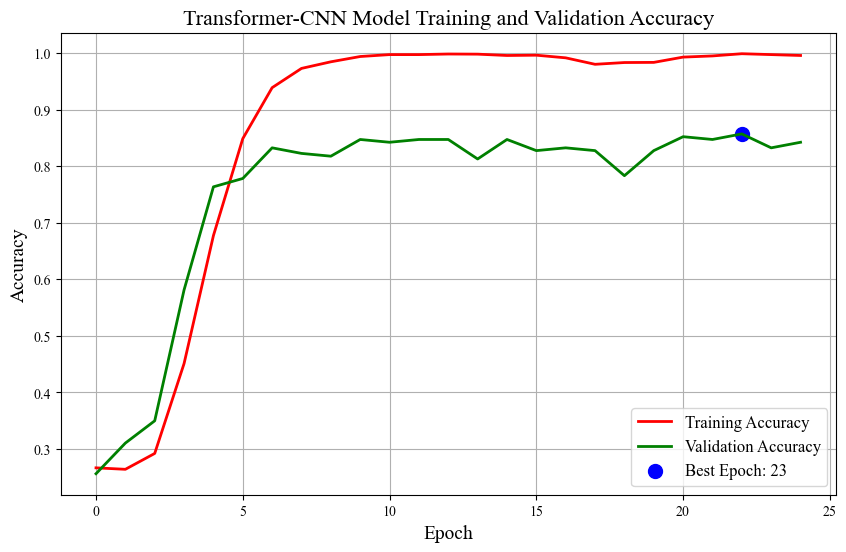

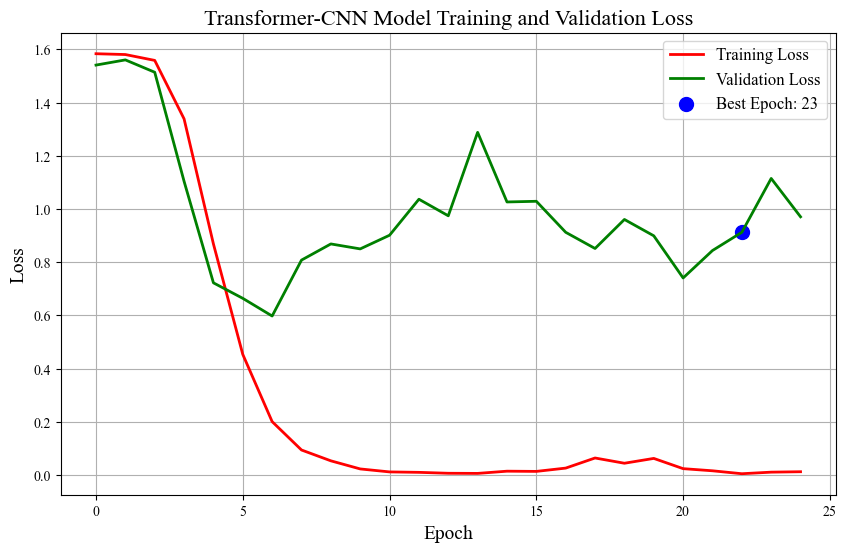

In [ ]:
model_name = "TRANSCNN"
visual_title = "Transformer-CNN Model"

# Extract training and validation accuracy from history
train_accuracy = locals()["history_" + model_name].history['accuracy']
val_accuracy = locals()["history_" + model_name].history['val_accuracy']

# Set the font to Times New Roman
matplotlib.rcParams['font.family'] = 'Times New Roman'

# Create a new figure and plot the accuracy curves
plt.figure(figsize=(10, 6))
plt.plot(train_accuracy, label='Training Accuracy', linewidth=2, color='red')
plt.plot(val_accuracy, label='Validation Accuracy', linewidth=2, color='green')

# Find the epoch with the highest validation accuracy
best_epoch = val_accuracy.index(max(val_accuracy))
best_val_accuracy = max(val_accuracy)

# Annotate the highest validation accuracy point
plt.scatter(best_epoch, best_val_accuracy, color='blue', label=f'Best Epoch: {best_epoch+1}', s=100)

# Add labels and title
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title(visual_title + ' Training and Validation Accuracy', fontsize=16)

# Add legend
plt.legend(fontsize=12)
plt.grid()
# Show the plot
plt.show()


# Extract training and validation accuracy from history
train_loss = locals()["history_" + model_name].history['loss']
val_loss = locals()["history_" + model_name].history['val_loss']

# Set the font to Times New Roman
matplotlib.rcParams['font.family'] = 'Times New Roman'

# Create a new figure and plot the accuracy curves
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss', linewidth=2, color='red')
plt.plot(val_loss, label='Validation Loss', linewidth=2, color='green')

# Add labels and title
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title(visual_title + ' Training and Validation Loss', fontsize=16)

# Find the epoch with the highest validation accuracy
best_val_loss = val_loss[best_epoch]

# Annotate the highest validation accuracy point
plt.scatter(best_epoch, best_val_loss, color='blue', label=f'Best Epoch: {best_epoch+1}', s=100)

# Add legend
plt.legend(fontsize=12)
plt.grid()

# Show the plot
plt.show()

## e. Model Transformer-LSTM


In [ ]:
word_token_all = np.max(input_data_encoded_train)
max_seq_length = input_data_encoded_train.shape[1]
embedding_dim = 256
vocab_size = word_token_all + 1
num_layers = 3
num_heads = 8
dff = 256


inputs = Input(shape=(max_seq_length,))

# Embedding layer
embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim)(inputs)

# Positional Encoding
positional_encoding = tf.keras.layers.Embedding(
    input_dim=max_seq_length, output_dim=embedding_dim
)(tf.range(start=0, limit=max_seq_length, delta=1))
inputs_with_position = embedding_layer + positional_encoding

# Multi-Head Attention and Feed Forward layers
x = inputs_with_position
for _ in range(num_layers):
    # Multi-Head Attention
    attention = MultiHeadAttention(
        num_heads=num_heads, key_dim=embedding_dim // num_heads
    )(x, x)
    attention = tf.keras.layers.Dropout(0.25)(attention)
    x = LayerNormalization(epsilon=1e-6)(x + attention)

    # Feed Forward Network
    ffn = tf.keras.Sequential([
        Dense(dff, activation='relu'),
        Dense(embedding_dim)
    ])
    ffn_output = ffn(x)
    ffn_output = tf.keras.layers.Dropout(0.25)(ffn_output)
    x = LayerNormalization(epsilon=1e-6)(x + ffn_output)

lstm_layer = Bidirectional(LSTM(embedding_dim//2, return_sequences=True))(x)
lstm_layer2 = Bidirectional(LSTM(embedding_dim//2, return_sequences=False))(lstm_layer)
flatten_layer = Flatten()(lstm_layer)
# lastdense_layer = Dropout(0.25)(Dense(128, activation='relu')(flatten_layer))
outputs = Dense(5, activation='softmax')(lstm_layer2)

model_TRANSLSTM = Model(inputs, outputs)

In [ ]:
model_TRANSLSTM.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 68)]                 0         []                            
                                                                                                  
 embedding_6 (Embedding)     (None, 68, 256)              3245056   ['input_4[0][0]']             
                                                                                                  
 tf.__operators__.add_21 (T  (None, 68, 256)              0         ['embedding_6[0][0]']         
 FOpLambda)                                                                                       
                                                                                                  
 multi_head_attention_9 (Mu  (None, 68, 256)              263168    ['tf.__operators__.add_2

                                                                                                  
 tf.__operators__.add_27 (T  (None, 68, 256)              0         ['layer_normalization_22[0][0]
 FOpLambda)                                                         ',                            
                                                                     'dropout_23[0][0]']          
                                                                                                  
 layer_normalization_23 (La  (None, 68, 256)              512       ['tf.__operators__.add_27[0][0
 yerNormalization)                                                  ]']                           
                                                                                                  
 bidirectional_2 (Bidirecti  (None, 68, 256)              394240    ['layer_normalization_23[0][0]
 onal)                                                              ']                            
          

In [ ]:
# Compile the model
model_TRANSLSTM.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Define a ModelCheckpoint callback to save the best model based on validation accuracy
best_model_checkpoint = ModelCheckpoint(
    filepath='best_model_TRANSLSTM.h5',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

In [ ]:
start_time_TRANSLSTM = time.time()
history_TRANSLSTM = model_TRANSLSTM.fit(X_train, y_train, epochs=25, batch_size=100, validation_data=(X_val_op, y_val), callbacks=[best_model_checkpoint])
end_time_TRANSLSTM = time.time()

Epoch 1/25
39/39 [==============================] - ETA: 0s - loss: 1.6101 - accuracy: 0.2624
Epoch 1: val_accuracy improved from -inf to 0.32512, saving model to best_model_TRANSLSTM.h5
39/39 [==============================] - 121s 3s/step - loss: 1.6101 - accuracy: 0.2624 - val_loss: 1.5413 - val_accuracy: 0.3251
Epoch 2/25
39/39 [==============================] - ETA: 0s - loss: 1.4070 - accuracy: 0.4009
Epoch 2: val_accuracy improved from 0.32512 to 0.66010, saving model to best_model_TRANSLSTM.h5
39/39 [==============================] - 101s 3s/step - loss: 1.4070 - accuracy: 0.4009 - val_loss: 1.0112 - val_accuracy: 0.6601
Epoch 3/25
39/39 [==============================] - ETA: 0s - loss: 0.7524 - accuracy: 0.7379
Epoch 3: val_accuracy improved from 0.66010 to 0.73892, saving model to best_model_TRANSLSTM.h5
39/39 [==============================] - 103s 3s/step - loss: 0.7524 - accuracy: 0.7379 - val_loss: 0.6960 - val_accuracy: 0.7389
Epoch 4/25
39/39 [=========================

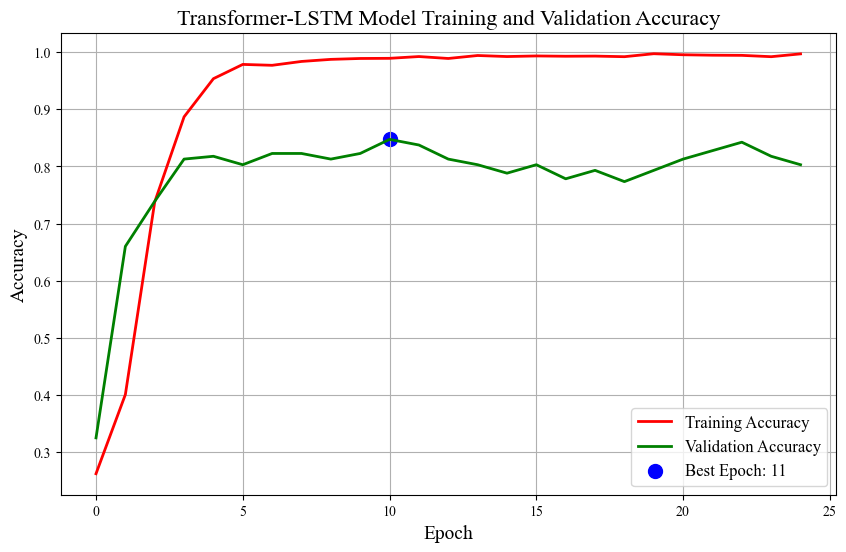

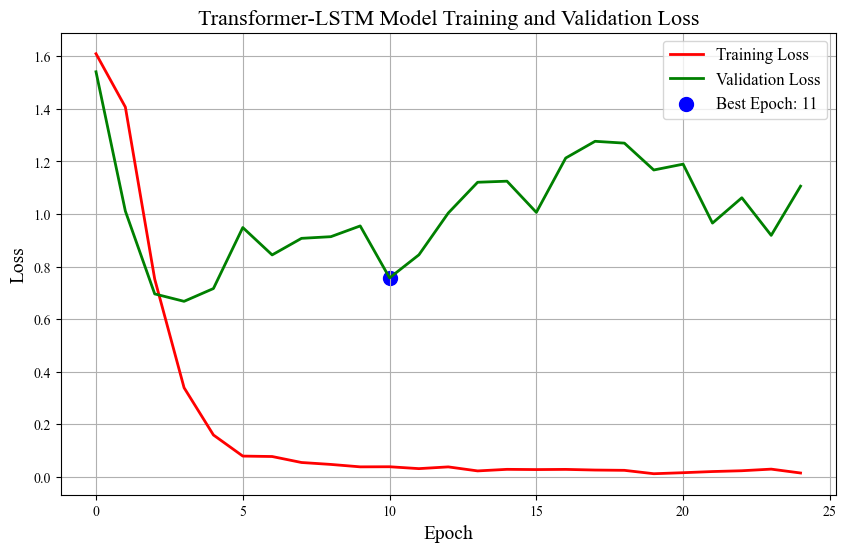

In [ ]:
model_name = "TRANSLSTM"
visual_title = "Transformer-LSTM Model"

# Extract training and validation accuracy from history
train_accuracy = locals()["history_" + model_name].history['accuracy']
val_accuracy = locals()["history_" + model_name].history['val_accuracy']

# Set the font to Times New Roman
matplotlib.rcParams['font.family'] = 'Times New Roman'

# Create a new figure and plot the accuracy curves
plt.figure(figsize=(10, 6))
plt.plot(train_accuracy, label='Training Accuracy', linewidth=2, color='red')
plt.plot(val_accuracy, label='Validation Accuracy', linewidth=2, color='green')

# Find the epoch with the highest validation accuracy
best_epoch = val_accuracy.index(max(val_accuracy))
best_val_accuracy = max(val_accuracy)

# Annotate the highest validation accuracy point
plt.scatter(best_epoch, best_val_accuracy, color='blue', label=f'Best Epoch: {best_epoch+1}', s=100)

# Add labels and title
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title(visual_title + ' Training and Validation Accuracy', fontsize=16)

# Add legend
plt.legend(fontsize=12)
plt.grid()
# Show the plot
plt.show()


# Extract training and validation accuracy from history
train_loss = locals()["history_" + model_name].history['loss']
val_loss = locals()["history_" + model_name].history['val_loss']

# Set the font to Times New Roman
matplotlib.rcParams['font.family'] = 'Times New Roman'

# Create a new figure and plot the accuracy curves
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss', linewidth=2, color='red')
plt.plot(val_loss, label='Validation Loss', linewidth=2, color='green')

# Add labels and title
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title(visual_title + ' Training and Validation Loss', fontsize=16)

# Find the epoch with the highest validation accuracy
best_val_loss = val_loss[best_epoch]

# Annotate the highest validation accuracy point
plt.scatter(best_epoch, best_val_loss, color='blue', label=f'Best Epoch: {best_epoch+1}', s=100)

# Add legend
plt.legend(fontsize=12)
plt.grid()

# Show the plot
plt.show()

## f. Model LSTM-CNN

In [ ]:
word_token_all = np.max(input_data_encoded_train)
max_seq_length = input_data_encoded_train.shape[1]
embedding_dim = 256
vocab_size = word_token_all + 1
num_layers = 3
num_heads = 8
dff = 256


inputs = Input(shape=(max_seq_length,))

# Embedding layer
embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim)(inputs)

# Positional Encoding
positional_encoding = tf.keras.layers.Embedding(
    input_dim=max_seq_length, output_dim=embedding_dim
)(tf.range(start=0, limit=max_seq_length, delta=1))
inputs_with_position = embedding_layer + positional_encoding

# Multi-Head Attention and Feed Forward layers
x = inputs_with_position
for i in range(num_layers):
    x = Bidirectional(LSTM(embedding_dim//(2**(i+1)), return_sequences=True))(x)

reshape_layer = tf.expand_dims(x, axis=-1)
conv_layer = LeakyReLU(0.1)(Conv2D(4, 6, 2)(reshape_layer))
maxpool_layer = MaxPooling2D(2)(conv_layer)
conv_layer2 = LeakyReLU(0.1)(Conv2D(16, (10, 9), 2)(maxpool_layer))
maxpool_layer2 = MaxPooling2D(2)(conv_layer2)
flatten_layer = Flatten()(maxpool_layer2)
# lastdense_layer = Dropout(0.25)(Dense(128, activation='relu')(flatten_layer))
outputs = Dense(5, activation='softmax')(flatten_layer)

model_LSTMCNN = Model(inputs, outputs)
model_LSTMCNN.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 68)]              0         
                                                                 
 embedding_26 (Embedding)    (None, 68, 256)           3245056   
                                                                 
 tf.__operators__.add_37 (T  (None, 68, 256)           0         
 FOpLambda)                                                      
                                                                 
 bidirectional_21 (Bidirect  (None, 68, 256)           394240    
 ional)                                                          
                                                                 
 bidirectional_22 (Bidirect  (None, 68, 128)           164352    
 ional)                                                          
                                                           

In [ ]:
# Compile the model
model_LSTMCNN.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define a ModelCheckpoint callback to save the best model based on validation accuracy
best_model_checkpoint = ModelCheckpoint(
    filepath='best_model_LSTMCNN.h5',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

In [ ]:
start_time_LSTMCNN = time.time()
history_LSTMCNN = model_LSTMCNN.fit(X_train, y_train, epochs=25, batch_size=100, validation_data=(X_val_op, y_val), callbacks=[best_model_checkpoint])
end_time_LSTMCNN = time.time()

Epoch 1/25
39/39 [==============================] - ETA: 0s - loss: 1.5534 - accuracy: 0.2666
Epoch 1: val_accuracy improved from -inf to 0.41379, saving model to best_model_LSTMCNN.h5
39/39 [==============================] - 42s 912ms/step - loss: 1.5534 - accuracy: 0.2666 - val_loss: 1.4215 - val_accuracy: 0.4138
Epoch 2/25
39/39 [==============================] - ETA: 0s - loss: 1.3146 - accuracy: 0.4128
Epoch 2: val_accuracy improved from 0.41379 to 0.53202, saving model to best_model_LSTMCNN.h5
39/39 [==============================] - 34s 869ms/step - loss: 1.3146 - accuracy: 0.4128 - val_loss: 1.0657 - val_accuracy: 0.5320
Epoch 3/25
39/39 [==============================] - ETA: 0s - loss: 0.9249 - accuracy: 0.5653
Epoch 3: val_accuracy improved from 0.53202 to 0.63547, saving model to best_model_LSTMCNN.h5
39/39 [==============================] - 34s 875ms/step - loss: 0.9249 - accuracy: 0.5653 - val_loss: 0.9152 - val_accuracy: 0.6355
Epoch 4/25
39/39 [=========================

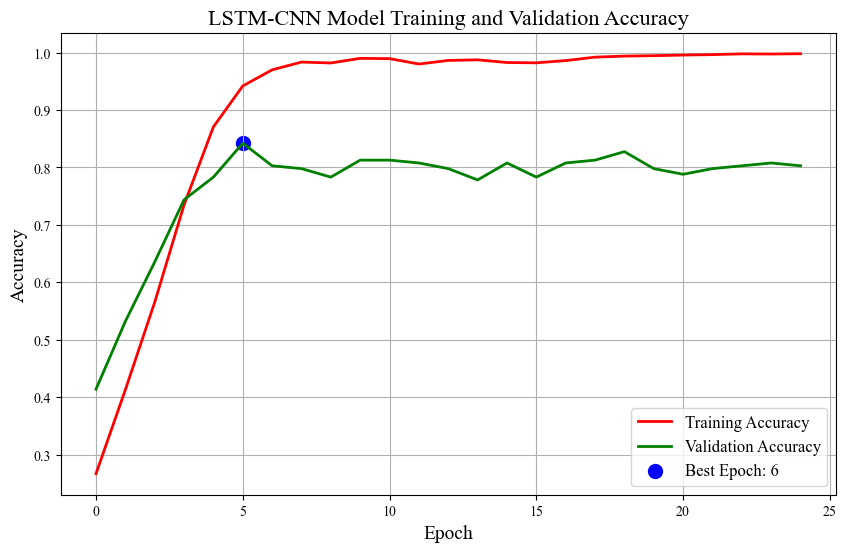

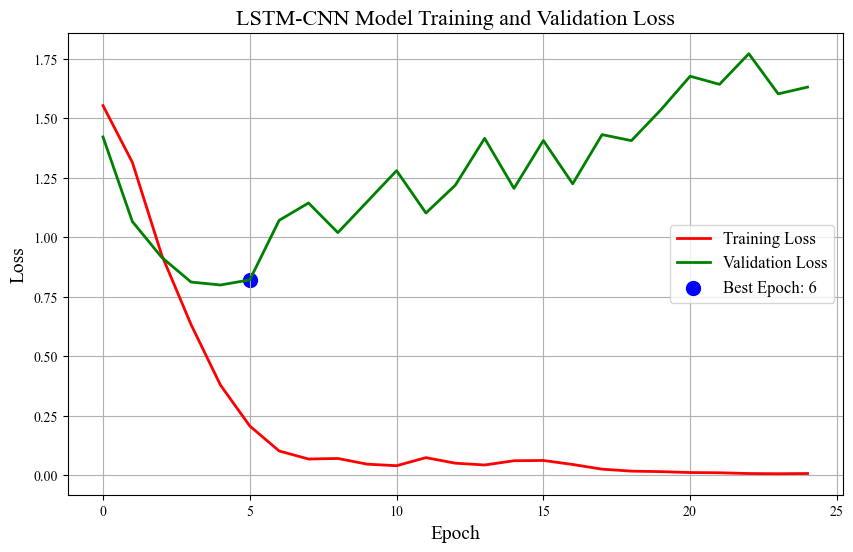

In [ ]:
model_name = "LSTMCNN"
visual_title = "LSTM-CNN Model"

# Extract training and validation accuracy from history
train_accuracy = locals()["history_" + model_name].history['accuracy']
val_accuracy = locals()["history_" + model_name].history['val_accuracy']

# Set the font to Times New Roman
matplotlib.rcParams['font.family'] = 'Times New Roman'

# Create a new figure and plot the accuracy curves
plt.figure(figsize=(10, 6))
plt.plot(train_accuracy, label='Training Accuracy', linewidth=2, color='red')
plt.plot(val_accuracy, label='Validation Accuracy', linewidth=2, color='green')

# Find the epoch with the highest validation accuracy
best_epoch = val_accuracy.index(max(val_accuracy))
best_val_accuracy = max(val_accuracy)

# Annotate the highest validation accuracy point
plt.scatter(best_epoch, best_val_accuracy, color='blue', label=f'Best Epoch: {best_epoch+1}', s=100)

# Add labels and title
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title(visual_title + ' Training and Validation Accuracy', fontsize=16)

# Add legend
plt.legend(fontsize=12)
plt.grid()
# Show the plot
plt.show()


# Extract training and validation accuracy from history
train_loss = locals()["history_" + model_name].history['loss']
val_loss = locals()["history_" + model_name].history['val_loss']

# Set the font to Times New Roman
matplotlib.rcParams['font.family'] = 'Times New Roman'

# Create a new figure and plot the accuracy curves
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss', linewidth=2, color='red')
plt.plot(val_loss, label='Validation Loss', linewidth=2, color='green')

# Add labels and title
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title(visual_title + ' Training and Validation Loss', fontsize=16)

# Find the epoch with the highest validation accuracy
best_val_loss = val_loss[best_epoch]

# Annotate the highest validation accuracy point
plt.scatter(best_epoch, best_val_loss, color='blue', label=f'Best Epoch: {best_epoch+1}', s=100)

# Add legend
plt.legend(fontsize=12)
plt.grid()

# Show the plot
plt.show()

## g. Model Transformer-LSTM-CNN

In [ ]:
word_token_all = np.max(input_data_encoded_train)
max_seq_length = input_data_encoded_train.shape[1]
embedding_dim = 256
vocab_size = word_token_all + 1
num_layers = 3
num_heads = 8
dff = 256


inputs = Input(shape=(max_seq_length,))

# Embedding layer
embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim)(inputs)

# Positional Encoding
positional_encoding = tf.keras.layers.Embedding(
    input_dim=max_seq_length, output_dim=embedding_dim
)(tf.range(start=0, limit=max_seq_length, delta=1))
inputs_with_position = embedding_layer + positional_encoding

# Multi-Head Attention and Feed Forward layers
x = inputs_with_position
for _ in range(num_layers):
    # Multi-Head Attention
    attention = MultiHeadAttention(
        num_heads=num_heads, key_dim=embedding_dim // num_heads
    )(x, x)
    attention = tf.keras.layers.Dropout(0.25)(attention)
    x = LayerNormalization(epsilon=1e-6)(x + attention)

    # Feed Forward Network
    ffn = tf.keras.Sequential([
        Dense(dff, activation='relu'),
        Dense(embedding_dim)
    ])
    ffn_output = ffn(x)
    ffn_output = tf.keras.layers.Dropout(0.25)(ffn_output)
    x = LayerNormalization(epsilon=1e-6)(x + ffn_output)

lstm_layer = Bidirectional(LSTM(embedding_dim//2, return_sequences=True))(x)
lstm_layer2 = Bidirectional(LSTM(embedding_dim//2, return_sequences=True))(lstm_layer)
reshape_layer = tf.expand_dims(lstm_layer2, axis=-1)
conv_layer = LeakyReLU(0.1)(Conv2D(4, 6, 2)(reshape_layer))
maxpool_layer = MaxPooling2D(2)(conv_layer)
conv_layer2 = LeakyReLU(0.1)(Conv2D(16, (10, 9), 2)(maxpool_layer))
maxpool_layer2 = MaxPooling2D(2)(conv_layer2)
flatten_layer = Flatten()(maxpool_layer2)
# lastdense_layer = Dropout(0.25)(Dense(128, activation='relu')(flatten_layer))
outputs = Dense(5, activation='softmax')(flatten_layer)

model_TRANSLSTMCNN = Model(inputs, outputs)
model_TRANSLSTMCNN.summary()

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_17 (InputLayer)       [(None, 68)]                 0         []                            
                                                                                                  
 embedding_32 (Embedding)    (None, 68, 256)              3245056   ['input_17[0][0]']            
                                                                                                  
 tf.__operators__.add_52 (T  (None, 68, 256)              0         ['embedding_32[0][0]']        
 FOpLambda)                                                                                       
                                                                                                  
 multi_head_attention_18 (M  (None, 68, 256)              263168    ['tf.__operators__.add_

                                                                                                  
 tf.__operators__.add_58 (T  (None, 68, 256)              0         ['layer_normalization_40[0][0]
 FOpLambda)                                                         ',                            
                                                                     'dropout_41[0][0]']          
                                                                                                  
 layer_normalization_41 (La  (None, 68, 256)              512       ['tf.__operators__.add_58[0][0
 yerNormalization)                                                  ]']                           
                                                                                                  
 bidirectional_26 (Bidirect  (None, 68, 256)              394240    ['layer_normalization_41[0][0]
 ional)                                                             ']                            
          

In [ ]:
# Compile the model
model_TRANSLSTMCNN.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define a ModelCheckpoint callback to save the best model based on validation accuracy
best_model_checkpoint = ModelCheckpoint(
    filepath='best_model_TRANSLSTMCNN.h5',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

In [ ]:
start_time_TRANSLSTMCNN = time.time()
history_TRANSLSTMCNN = model_TRANSLSTMCNN.fit(X_train, y_train, epochs=25, batch_size=100, validation_data=(X_val_op, y_val), callbacks=[best_model_checkpoint])
end_time_TRANSLSTMCNN = time.time()

Epoch 1/25
39/39 [==============================] - ETA: 0s - loss: 1.5805 - accuracy: 0.2557
Epoch 1: val_accuracy improved from -inf to 0.27586, saving model to best_model_TRANSLSTMCNN.h5
39/39 [==============================] - 123s 3s/step - loss: 1.5805 - accuracy: 0.2557 - val_loss: 1.5519 - val_accuracy: 0.2759
Epoch 2/25
39/39 [==============================] - ETA: 0s - loss: 1.5755 - accuracy: 0.2580
Epoch 2: val_accuracy did not improve from 0.27586
39/39 [==============================] - 114s 3s/step - loss: 1.5755 - accuracy: 0.2580 - val_loss: 1.5608 - val_accuracy: 0.2562
Epoch 3/25
39/39 [==============================] - ETA: 0s - loss: 1.5753 - accuracy: 0.2642
Epoch 3: val_accuracy improved from 0.27586 to 0.30542, saving model to best_model_TRANSLSTMCNN.h5
39/39 [==============================] - 115s 3s/step - loss: 1.5753 - accuracy: 0.2642 - val_loss: 1.5527 - val_accuracy: 0.3054
Epoch 4/25
39/39 [==============================] - ETA: 0s - loss: 1.5740 - accur

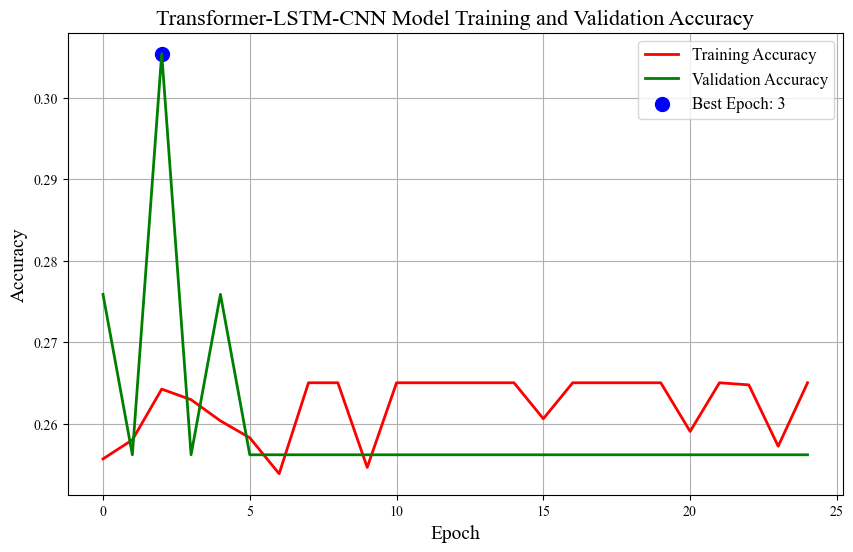

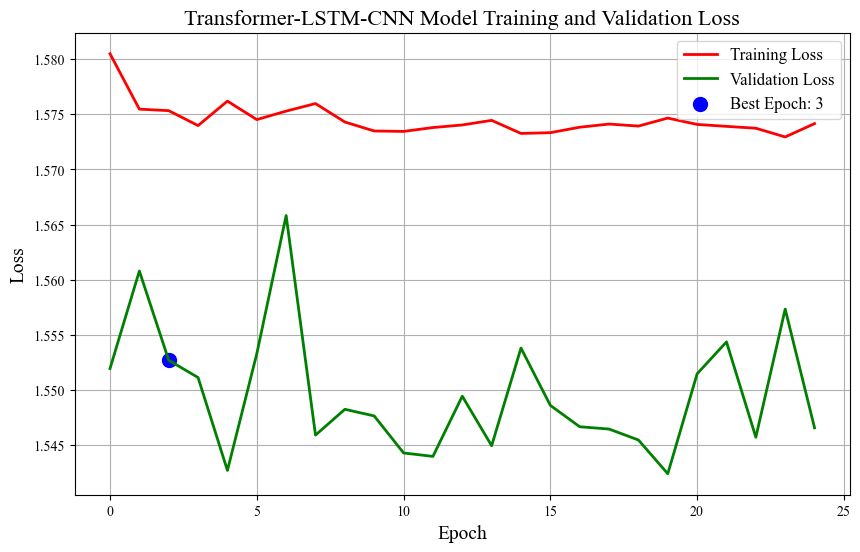

In [ ]:
model_name = "TRANSLSTMCNN"
visual_title = "Transformer-LSTM-CNN Model"

# Extract training and validation accuracy from history
train_accuracy = locals()["history_" + model_name].history['accuracy']
val_accuracy = locals()["history_" + model_name].history['val_accuracy']

# Set the font to Times New Roman
matplotlib.rcParams['font.family'] = 'Times New Roman'

# Create a new figure and plot the accuracy curves
plt.figure(figsize=(10, 6))
plt.plot(train_accuracy, label='Training Accuracy', linewidth=2, color='red')
plt.plot(val_accuracy, label='Validation Accuracy', linewidth=2, color='green')

# Find the epoch with the highest validation accuracy
best_epoch = val_accuracy.index(max(val_accuracy))
best_val_accuracy = max(val_accuracy)

# Annotate the highest validation accuracy point
plt.scatter(best_epoch, best_val_accuracy, color='blue', label=f'Best Epoch: {best_epoch+1}', s=100)

# Add labels and title
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title(visual_title + ' Training and Validation Accuracy', fontsize=16)

# Add legend
plt.legend(fontsize=12)
plt.grid()
# Show the plot
plt.show()


# Extract training and validation accuracy from history
train_loss = locals()["history_" + model_name].history['loss']
val_loss = locals()["history_" + model_name].history['val_loss']

# Set the font to Times New Roman
matplotlib.rcParams['font.family'] = 'Times New Roman'

# Create a new figure and plot the accuracy curves
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss', linewidth=2, color='red')
plt.plot(val_loss, label='Validation Loss', linewidth=2, color='green')

# Add labels and title
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title(visual_title + ' Training and Validation Loss', fontsize=16)

# Find the epoch with the highest validation accuracy
best_val_loss = val_loss[best_epoch]

# Annotate the highest validation accuracy point
plt.scatter(best_epoch, best_val_loss, color='blue', label=f'Best Epoch: {best_epoch+1}', s=100)

# Add legend
plt.legend(fontsize=12)
plt.grid()

# Show the plot
plt.show()

## h. Model Transformer saja

In [ ]:
word_token_all = np.max(input_data_encoded_train)
max_seq_length = input_data_encoded_train.shape[1]
embedding_dim = 256
vocab_size = word_token_all + 1
num_layers = 3
num_heads = 8
dff = 256


inputs = Input(shape=(max_seq_length,))

# Embedding layer
embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim)(inputs)

# Positional Encoding
positional_encoding = tf.keras.layers.Embedding(
    input_dim=max_seq_length, output_dim=embedding_dim
)(tf.range(start=0, limit=max_seq_length, delta=1))
inputs_with_position = embedding_layer + positional_encoding

# Multi-Head Attention and Feed Forward layers
x = inputs_with_position
for _ in range(num_layers):
    # Multi-Head Attention
    attention = MultiHeadAttention(
        num_heads=num_heads, key_dim=embedding_dim // num_heads
    )(x, x)
    attention = tf.keras.layers.Dropout(0.25)(attention)
    x = LayerNormalization(epsilon=1e-6)(x + attention)

    # Feed Forward Network
    ffn = tf.keras.Sequential([
        Dense(dff, activation='relu'),
        Dense(embedding_dim)
    ])
    ffn_output = ffn(x)
    ffn_output = tf.keras.layers.Dropout(0.25)(ffn_output)
    x = LayerNormalization(epsilon=1e-6)(x + ffn_output)

flatten_layer = Flatten()(x)
lastdense_layer = Dense(64, activation='relu')(flatten_layer)
outputs = Dense(5, activation='softmax')(lastdense_layer)

model_TRANSONLY = Model(inputs, outputs)
model_TRANSONLY.summary()

Model: "model_16"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_25 (InputLayer)       [(None, 68)]                 0         []                            
                                                                                                  
 embedding_48 (Embedding)    (None, 68, 256)              3245056   ['input_25[0][0]']            
                                                                                                  
 tf.__operators__.add_78 (T  (None, 68, 256)              0         ['embedding_48[0][0]']        
 FOpLambda)                                                                                       
                                                                                                  
 multi_head_attention_27 (M  (None, 68, 256)              263168    ['tf.__operators__.add_

                                                                                                  
 tf.__operators__.add_84 (T  (None, 68, 256)              0         ['layer_normalization_58[0][0]
 FOpLambda)                                                         ',                            
                                                                     'dropout_59[0][0]']          
                                                                                                  
 layer_normalization_59 (La  (None, 68, 256)              512       ['tf.__operators__.add_84[0][0
 yerNormalization)                                                  ]']                           
                                                                                                  
 flatten_16 (Flatten)        (None, 17408)                0         ['layer_normalization_59[0][0]
                                                                    ']                            
          

In [ ]:
# Compile the model
model_TRANSONLY.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define a ModelCheckpoint callback to save the best model based on validation accuracy
best_model_checkpoint = ModelCheckpoint(
    filepath='best_model_TRANSONLY.h5',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

In [ ]:
start_time_TRANSONLY = time.time()
history_TRANSONLY = model_TRANSONLY.fit(X_train, y_train, epochs=25, batch_size=100, validation_data=(X_val_op, y_val), callbacks=[best_model_checkpoint])
end_time_TRANSONLY = time.time()

Epoch 1/25
39/39 [==============================] - ETA: 0s - loss: 2.8568 - accuracy: 0.2421
Epoch 1: val_accuracy improved from -inf to 0.25616, saving model to best_model_TRANSONLY.h5


C:\Users\Jemmy\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


39/39 [==============================] - 75s 2s/step - loss: 2.8568 - accuracy: 0.2421 - val_loss: 1.6071 - val_accuracy: 0.2562
Epoch 2/25
39/39 [==============================] - ETA: 0s - loss: 1.6057 - accuracy: 0.2650
Epoch 2: val_accuracy did not improve from 0.25616
39/39 [==============================] - 69s 2s/step - loss: 1.6057 - accuracy: 0.2650 - val_loss: 1.6019 - val_accuracy: 0.2562
Epoch 3/25
39/39 [==============================] - ETA: 0s - loss: 1.6016 - accuracy: 0.2650
Epoch 3: val_accuracy did not improve from 0.25616
39/39 [==============================] - 69s 2s/step - loss: 1.6016 - accuracy: 0.2650 - val_loss: 1.5962 - val_accuracy: 0.2562
Epoch 4/25
39/39 [==============================] - ETA: 0s - loss: 1.5976 - accuracy: 0.2650
Epoch 4: val_accuracy did not improve from 0.25616
39/39 [==============================] - 70s 2s/step - loss: 1.5976 - accuracy: 0.2650 - val_loss: 1.5909 - val_accuracy: 0.2562
Epoch 5/25
39/39 [==============================]

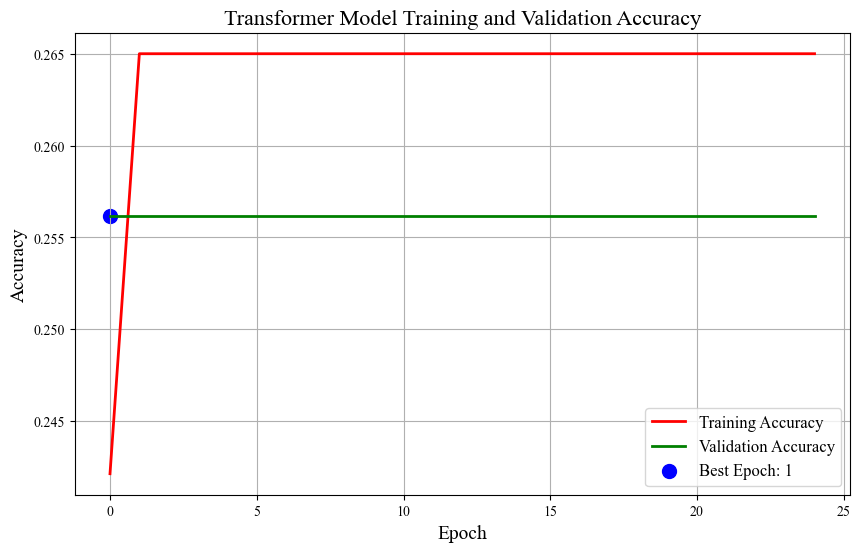

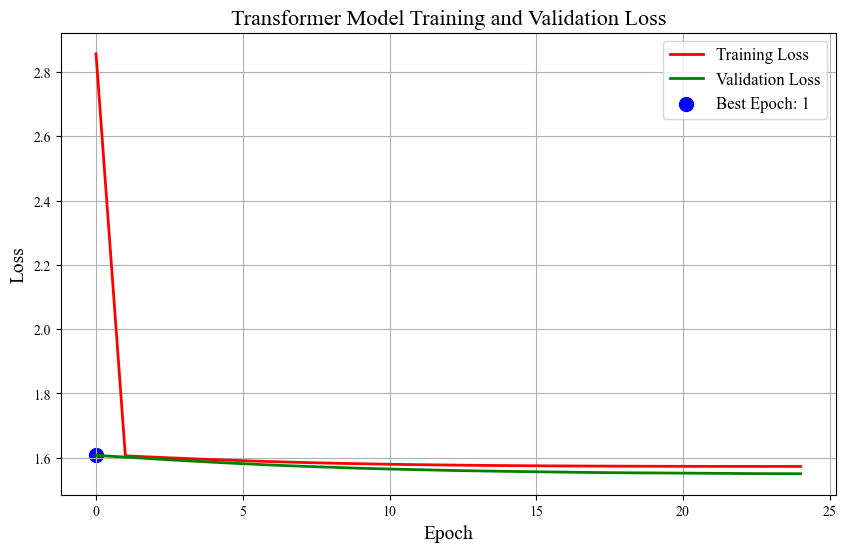

In [ ]:
model_name = "TRANSONLY"
visual_title = "Transformer Model"

# Extract training and validation accuracy from history
train_accuracy = locals()["history_" + model_name].history['accuracy']
val_accuracy = locals()["history_" + model_name].history['val_accuracy']

# Set the font to Times New Roman
matplotlib.rcParams['font.family'] = 'Times New Roman'

# Create a new figure and plot the accuracy curves
plt.figure(figsize=(10, 6))
plt.plot(train_accuracy, label='Training Accuracy', linewidth=2, color='red')
plt.plot(val_accuracy, label='Validation Accuracy', linewidth=2, color='green')

# Find the epoch with the highest validation accuracy
best_epoch = val_accuracy.index(max(val_accuracy))
best_val_accuracy = max(val_accuracy)

# Annotate the highest validation accuracy point
plt.scatter(best_epoch, best_val_accuracy, color='blue', label=f'Best Epoch: {best_epoch+1}', s=100)

# Add labels and title
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title(visual_title + ' Training and Validation Accuracy', fontsize=16)

# Add legend
plt.legend(fontsize=12)
plt.grid()
# Show the plot
plt.show()


# Extract training and validation accuracy from history
train_loss = locals()["history_" + model_name].history['loss']
val_loss = locals()["history_" + model_name].history['val_loss']

# Set the font to Times New Roman
matplotlib.rcParams['font.family'] = 'Times New Roman'

# Create a new figure and plot the accuracy curves
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss', linewidth=2, color='red')
plt.plot(val_loss, label='Validation Loss', linewidth=2, color='green')

# Add labels and title
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title(visual_title + ' Training and Validation Loss', fontsize=16)

# Find the epoch with the highest validation accuracy
best_val_loss = val_loss[best_epoch]

# Annotate the highest validation accuracy point
plt.scatter(best_epoch, best_val_loss, color='blue', label=f'Best Epoch: {best_epoch+1}', s=100)

# Add legend
plt.legend(fontsize=12)
plt.grid()

# Show the plot
plt.show()

## i. Model LSTM saja

In [ ]:
word_token_all = np.max(input_data_encoded_train)
max_seq_length = input_data_encoded_train.shape[1]
embedding_dim = 256
vocab_size = word_token_all + 1
num_layers = 3
num_heads = 8
dff = 256


inputs = Input(shape=(max_seq_length,))

# Embedding layer
embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim)(inputs)

# Positional Encoding
positional_encoding = tf.keras.layers.Embedding(
    input_dim=max_seq_length, output_dim=embedding_dim
)(tf.range(start=0, limit=max_seq_length, delta=1))
inputs_with_position = embedding_layer + positional_encoding

# Multi-Head Attention and Feed Forward layers
x = inputs_with_position
for i in range(num_layers):
    x = Bidirectional(LSTM(embedding_dim//(2**(i+1)), return_sequences=True))(x)

flatten_layer = Flatten()(x)
lastdense_layer = Dense(64, activation='relu')(flatten_layer)
outputs = Dense(5, activation='softmax')(lastdense_layer)

model_LSTMONLY = Model(inputs, outputs)
model_LSTMONLY.summary()

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_26 (InputLayer)       [(None, 68)]              0         
                                                                 
 embedding_50 (Embedding)    (None, 68, 256)           3245056   
                                                                 
 tf.__operators__.add_85 (T  (None, 68, 256)           0         
 FOpLambda)                                                      
                                                                 
 bidirectional_31 (Bidirect  (None, 68, 256)           394240    
 ional)                                                          
                                                                 
 bidirectional_32 (Bidirect  (None, 68, 128)           164352    
 ional)                                                          
                                                          

In [ ]:
# Compile the model
model_LSTMONLY.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define a ModelCheckpoint callback to save the best model based on validation accuracy
best_model_checkpoint = ModelCheckpoint(
    filepath='best_model_LSTMONLY.h5',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

In [ ]:
start_time_LSTMONLY = time.time()
history_LSTMONLY = model_LSTMONLY.fit(X_train, y_train, epochs=25, batch_size=100, validation_data=(X_val_op, y_val), callbacks=[best_model_checkpoint])
end_time_LSTMONLY = time.time()

Epoch 1/25
39/39 [==============================] - ETA: 0s - loss: 1.4834 - accuracy: 0.3144
Epoch 1: val_accuracy improved from -inf to 0.48768, saving model to best_model_LSTMONLY.h5
39/39 [==============================] - 40s 844ms/step - loss: 1.4834 - accuracy: 0.3144 - val_loss: 1.1979 - val_accuracy: 0.4877
Epoch 2/25
39/39 [==============================] - ETA: 0s - loss: 0.8115 - accuracy: 0.6911
Epoch 2: val_accuracy improved from 0.48768 to 0.71429, saving model to best_model_LSTMONLY.h5
39/39 [==============================] - 32s 811ms/step - loss: 0.8115 - accuracy: 0.6911 - val_loss: 0.7551 - val_accuracy: 0.7143
Epoch 3/25
39/39 [==============================] - ETA: 0s - loss: 0.3610 - accuracy: 0.8807
Epoch 3: val_accuracy improved from 0.71429 to 0.83251, saving model to best_model_LSTMONLY.h5
39/39 [==============================] - 35s 911ms/step - loss: 0.3610 - accuracy: 0.8807 - val_loss: 0.6049 - val_accuracy: 0.8325
Epoch 4/25
39/39 [======================

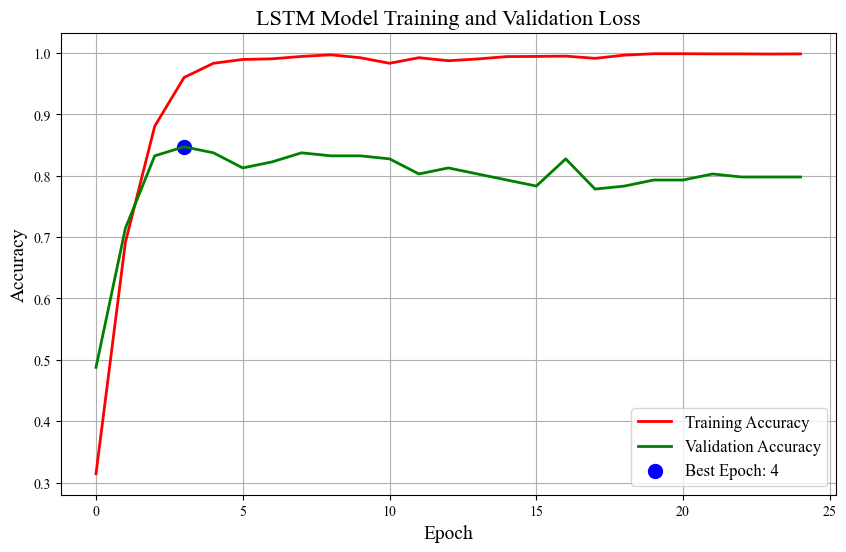

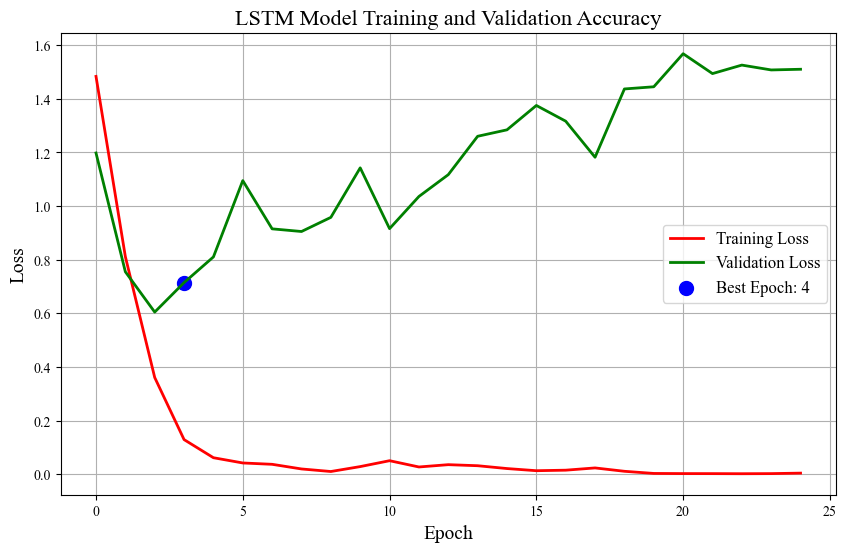

In [ ]:
model_name = "LSTMONLY"
visual_title = "LSTM Model"

# Extract training and validation accuracy from history
train_accuracy = locals()["history_" + model_name].history['accuracy']
val_accuracy = locals()["history_" + model_name].history['val_accuracy']

# Set the font to Times New Roman
matplotlib.rcParams['font.family'] = 'Times New Roman'

# Create a new figure and plot the accuracy curves
plt.figure(figsize=(10, 6))
plt.plot(train_accuracy, label='Training Accuracy', linewidth=2, color='red')
plt.plot(val_accuracy, label='Validation Accuracy', linewidth=2, color='green')

# Find the epoch with the highest validation accuracy
best_epoch = val_accuracy.index(max(val_accuracy))
best_val_accuracy = max(val_accuracy)

# Annotate the highest validation accuracy point
plt.scatter(best_epoch, best_val_accuracy, color='blue', label=f'Best Epoch: {best_epoch+1}', s=100)

# Add labels and title
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title(visual_title + ' Training and Validation Loss', fontsize=16)

# Add legend
plt.legend(fontsize=12)
plt.grid()
# Show the plot
plt.show()


# Extract training and validation accuracy from history
train_loss = locals()["history_" + model_name].history['loss']
val_loss = locals()["history_" + model_name].history['val_loss']

# Set the font to Times New Roman
matplotlib.rcParams['font.family'] = 'Times New Roman'

# Create a new figure and plot the accuracy curves
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss', linewidth=2, color='red')
plt.plot(val_loss, label='Validation Loss', linewidth=2, color='green')

# Add labels and title
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title(visual_title + ' Training and Validation Accuracy', fontsize=16)

# Find the epoch with the highest validation accuracy
best_val_loss = val_loss[best_epoch]

# Annotate the highest validation accuracy point
plt.scatter(best_epoch, best_val_loss, color='blue', label=f'Best Epoch: {best_epoch+1}', s=100)

# Add legend
plt.legend(fontsize=12)
plt.grid()

# Show the plot
plt.show()

## j. Model CNN saja

In [ ]:
word_token_all = np.max(input_data_encoded_train)
max_seq_length = input_data_encoded_train.shape[1]
embedding_dim = 256
vocab_size = word_token_all + 1
num_layers = 3
num_heads = 8
dff = 256


inputs = Input(shape=(max_seq_length,))

# Embedding layer
embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim)(inputs)

# Positional Encoding
positional_encoding = tf.keras.layers.Embedding(
    input_dim=max_seq_length, output_dim=embedding_dim
)(tf.range(start=0, limit=max_seq_length, delta=1))
inputs_with_position = embedding_layer + positional_encoding

# Multi-Head Attention and Feed Forward layers
x = inputs_with_position
x = tf.expand_dims(x, axis=-1)
for i in range(num_layers):
    x = LeakyReLU(0.1)(Conv2D(2**(i+2), 8)(x))
    x = MaxPooling2D(2)(x)

flatten_layer = Flatten()(x)
lastdense_layer = Dense(64, activation='relu')(flatten_layer)
outputs = Dense(5, activation='softmax')(lastdense_layer)

model_CNNONLY = Model(inputs, outputs)
model_CNNONLY.summary()

Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_27 (InputLayer)       [(None, 68)]              0         
                                                                 
 embedding_52 (Embedding)    (None, 68, 256)           3245056   
                                                                 
 tf.__operators__.add_86 (T  (None, 68, 256)           0         
 FOpLambda)                                                      
                                                                 
 tf.expand_dims_9 (TFOpLamb  (None, 68, 256, 1)        0         
 da)                                                             
                                                                 
 conv2d_22 (Conv2D)          (None, 61, 249, 4)        260       
                                                                 
 leaky_re_lu_22 (LeakyReLU)  (None, 61, 249, 4)        0  

In [ ]:
# Compile the model
model_CNNONLY.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define a ModelCheckpoint callback to save the best model based on validation accuracy
best_model_checkpoint = ModelCheckpoint(
    filepath='best_model_CNNONLY.h5',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

In [ ]:
start_time_CNNONLY = time.time()
history_CNNONLY = model_CNNONLY.fit(X_train, y_train, epochs=25, batch_size=100, validation_data=(X_val_op, y_val), callbacks=[best_model_checkpoint])
end_time_CNNONLY = time.time()

Epoch 1/25
39/39 [==============================] - ETA: 0s - loss: 1.5800 - accuracy: 0.2663
Epoch 1: val_accuracy improved from -inf to 0.25616, saving model to best_model_CNNONLY.h5
39/39 [==============================] - 39s 985ms/step - loss: 1.5800 - accuracy: 0.2663 - val_loss: 1.5454 - val_accuracy: 0.2562
Epoch 2/25
39/39 [==============================] - ETA: 0s - loss: 1.5643 - accuracy: 0.2647
Epoch 2: val_accuracy did not improve from 0.25616
39/39 [==============================] - 38s 976ms/step - loss: 1.5643 - accuracy: 0.2647 - val_loss: 1.5320 - val_accuracy: 0.2562
Epoch 3/25
39/39 [==============================] - ETA: 0s - loss: 1.3674 - accuracy: 0.4017
Epoch 3: val_accuracy improved from 0.25616 to 0.64532, saving model to best_model_CNNONLY.h5
39/39 [==============================] - 38s 978ms/step - loss: 1.3674 - accuracy: 0.4017 - val_loss: 0.9493 - val_accuracy: 0.6453
Epoch 4/25
39/39 [==============================] - ETA: 0s - loss: 0.6338 - accuracy:

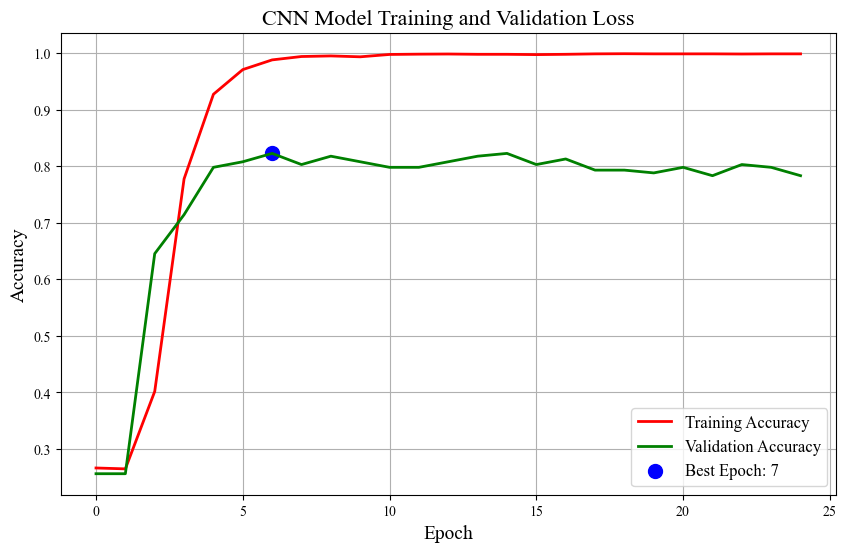

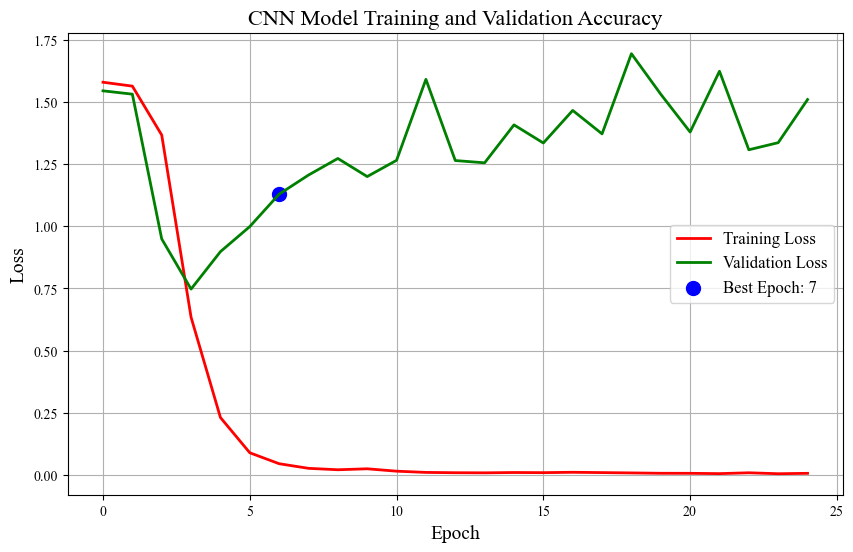

In [ ]:
model_name = "CNNONLY"
visual_title = "CNN Model"

# Extract training and validation accuracy from history
train_accuracy = locals()["history_" + model_name].history['accuracy']
val_accuracy = locals()["history_" + model_name].history['val_accuracy']

# Set the font to Times New Roman
matplotlib.rcParams['font.family'] = 'Times New Roman'

# Create a new figure and plot the accuracy curves
plt.figure(figsize=(10, 6))
plt.plot(train_accuracy, label='Training Accuracy', linewidth=2, color='red')
plt.plot(val_accuracy, label='Validation Accuracy', linewidth=2, color='green')

# Find the epoch with the highest validation accuracy
best_epoch = val_accuracy.index(max(val_accuracy))
best_val_accuracy = max(val_accuracy)

# Annotate the highest validation accuracy point
plt.scatter(best_epoch, best_val_accuracy, color='blue', label=f'Best Epoch: {best_epoch+1}', s=100)

# Add labels and title
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title(visual_title + ' Training and Validation Loss', fontsize=16)

# Add legend
plt.legend(fontsize=12)
plt.grid()
# Show the plot
plt.show()


# Extract training and validation accuracy from history
train_loss = locals()["history_" + model_name].history['loss']
val_loss = locals()["history_" + model_name].history['val_loss']

# Set the font to Times New Roman
matplotlib.rcParams['font.family'] = 'Times New Roman'

# Create a new figure and plot the accuracy curves
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss', linewidth=2, color='red')
plt.plot(val_loss, label='Validation Loss', linewidth=2, color='green')

# Add labels and title
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title(visual_title + ' Training and Validation Accuracy', fontsize=16)

# Find the epoch with the highest validation accuracy
best_val_loss = val_loss[best_epoch]

# Annotate the highest validation accuracy point
plt.scatter(best_epoch, best_val_loss, color='blue', label=f'Best Epoch: {best_epoch+1}', s=100)

# Add legend
plt.legend(fontsize=12)
plt.grid()

# Show the plot
plt.show()

## k. Model BERT + Fine Tuning

In [ ]:
indices_in_original_dataset = []

for x_test_sample in X_val:
    try:
        index = X.tolist().index(x_test_sample.tolist())
        indices_in_original_dataset.append(index)
    except ValueError:
        indices_in_original_dataset.append(None)  # Sample not found in the original dataset

print(indices_in_original_dataset)

[3908, 149, 2031, 3196, 3209, 599, 3792, 1675, 2159, 3307, 2876, 2917, 2740, 2413, 2114, 2226, 1044, 551, 3095, 3597, 864, 2545, 3158, 3715, 2083, 1023, 3288, 3970, 1647, 2484, 3698, 4039, 2080, 978, 3855, 1128, 3278, 831, 1068, 3097, 2334, 2749, 3379, 1448, 605, 811, 1957, 33, 869, 3045, 1041, 1176, 1042, 3093, 3688, 2276, 3089, 761, 2648, 718, 4005, 166, 3720, 3456, 2527, 2583, 3913, 1613, 3489, 544, 2835, 2471, 912, 1138, 1723, 1263, 2850, 408, 3447, 2414, 746, 1344, 70, 1221, 1289, 298, 325, 893, 14, 3522, 3677, 3142, 1659, 471, 8, 109, 2260, 318, 2350, 3886, 2266, 1789, 2184, 3526, 2345, 432, 985, 184, 2843, 2409, 2892, 3709, 1938, 2764, 952, 1392, 196, 96, 1146, 576, 308, 3672, 4004, 676, 366, 1839, 538, 3782, 2514, 2374, 2820, 3544, 1720, 1760, 948, 3912, 32, 3161, 3198, 776, 2057, 2955, 1204, 2022, 229, 3588, 1896, 3528, 2554, 3164, 1983, 1842, 3329, 3422, 2872, 3163, 657, 457, 1377, 179, 1419, 1783, 721, 598, 495, 2846, 3106, 1429, 1411, 3193, 43, 2028, 2379, 2382, 2510, 2256,

In [ ]:
len(indices_in_original_dataset)

203

In [ ]:
indobert_data_final = pd.read_csv('indobert_data_final.csv')
indobert_data_final.head()

,Unnamed: 0,0,1,2,3,4
0,0,0.118912,0.292242,0.401348,0.150902,0.036596
1,1,0.024519,0.051299,0.163684,0.334328,0.426170
2,2,0.273661,0.336059,0.210026,0.123357,0.056897
3,3,0.043409,0.068810,0.163972,0.319264,0.404544
4,4,0.009928,0.012362,0.040785,0.246121,0.690804


In [ ]:
indobert_array = indobert_data_final.iloc[:, 1:6].to_numpy()
indobert_array.shape

(5036, 5)

In [ ]:
word_token_all = np.max(input_data_encoded_train)
max_seq_length = input_data_encoded_train.shape[1]
embedding_dim = 32
vocab_size = word_token_all + 1

# input 1
inputs_1 = Input(shape=(max_seq_length,))

# Embedding layer
embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim)(inputs_1)

# Positional Encoding
positional_encoding = tf.keras.layers.Embedding(
    input_dim=max_seq_length, output_dim=embedding_dim
)(tf.range(start=0, limit=max_seq_length, delta=1))
inputs_with_position = embedding_layer + positional_encoding

flatten_layer = Flatten()(inputs_with_position)
output_1 = Dense(5, activation='relu')(flatten_layer)


# input 2
inputs_2 = Input(shape=(5,))
dense_1 = Dropout(0.5)(Dense(64, activation='relu')(inputs_2))
dense_2 = Dropout(0.5)(Dense(64, activation='relu')(dense_1))
dense_3 = Dropout(0.5)(Dense(64, activation='relu')(dense_2))
output_2 = Dense(5, activation='relu')(dense_3)

merged_layer = Concatenate()([output_1, output_2])
final_dense_1 = Dropout(0.5)(Dense(64, activation='relu')(merged_layer))
final_dense_2 = Dropout(0.5)(Dense(64, activation='relu')(final_dense_1))
merged_output = Dense(5, activation='softmax')(final_dense_2)

model_INDOBERT = Model([inputs_1, inputs_2], merged_output)
model_INDOBERT.summary()

Model: "model_38"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_64 (InputLayer)       [(None, 5)]                  0         []                            
                                                                                                  
 dense_202 (Dense)           (None, 64)                   384       ['input_64[0][0]']            
                                                                                                  
 dropout_125 (Dropout)       (None, 64)                   0         ['dense_202[0][0]']           
                                                                                                  
 input_63 (InputLayer)       [(None, 68)]                 0         []                            
                                                                                           

In [ ]:
# Compile the model
model_INDOBERT.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define a ModelCheckpoint callback to save the best model based on validation accuracy
best_model_checkpoint = ModelCheckpoint(
    filepath='best_model_INDOBERT.h5',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

In [ ]:
y.shape

(4052, 5)

In [ ]:
x_train_indobert = (indobert_array[:4052])[~np.isin(np.arange(len((indobert_array[:4052]))), indices_in_original_dataset)]
print(x_train_indobert.shape)
x_val_indobert = indobert_array[indices_in_original_dataset]
print(x_val_indobert.shape)

(3849, 5)
(203, 5)


In [ ]:
X_train.shape

(3849, 68)

In [ ]:
start_time_INDOBERT = time.time()
history_INDOBERT = model_INDOBERT.fit((X_train, x_train_indobert), y_train, epochs=100, batch_size=100, validation_data=((X_val_op, x_val_indobert), y_val), callbacks=[best_model_checkpoint])
end_time_INDOBERT = time.time()

Epoch 1/100
38/39 [============================>.] - ETA: 0s - loss: 1.5959 - accuracy: 0.2503
Epoch 1: val_accuracy improved from -inf to 0.25616, saving model to best_model_INDOBERT.h5
39/39 [==============================] - 2s 16ms/step - loss: 1.5957 - accuracy: 0.2507 - val_loss: 1.5677 - val_accuracy: 0.2562
Epoch 2/100
36/39 [==========================>...] - ETA: 0s - loss: 1.5832 - accuracy: 0.2600
Epoch 2: val_accuracy did not improve from 0.25616
39/39 [==============================] - 0s 11ms/step - loss: 1.5843 - accuracy: 0.2577 - val_loss: 1.5624 - val_accuracy: 0.2562
Epoch 3/100
35/39 [=========================>....] - ETA: 0s - loss: 1.5789 - accuracy: 0.2634
Epoch 3: val_accuracy did not improve from 0.25616
39/39 [==============================] - 0s 10ms/step - loss: 1.5800 - accuracy: 0.2598 - val_loss: 1.5619 - val_accuracy: 0.2562
Epoch 4/100
35/39 [=========================>....] - ETA: 0s - loss: 1.5800 - accuracy: 0.2597
Epoch 4: val_accuracy did not improv

Epoch 29/100
32/39 [=======================>......] - ETA: 0s - loss: 0.1248 - accuracy: 0.9728
Epoch 29: val_accuracy did not improve from 0.75369
39/39 [==============================] - 0s 9ms/step - loss: 0.1198 - accuracy: 0.9751 - val_loss: 1.5601 - val_accuracy: 0.7291
Epoch 30/100
34/39 [=========================>....] - ETA: 0s - loss: 0.1065 - accuracy: 0.9771
Epoch 30: val_accuracy did not improve from 0.75369
39/39 [==============================] - 0s 9ms/step - loss: 0.1170 - accuracy: 0.9766 - val_loss: 1.7184 - val_accuracy: 0.7488
Epoch 31/100
35/39 [=========================>....] - ETA: 0s - loss: 0.1046 - accuracy: 0.9803
Epoch 31: val_accuracy improved from 0.75369 to 0.75862, saving model to best_model_INDOBERT.h5
39/39 [==============================] - 0s 13ms/step - loss: 0.1037 - accuracy: 0.9805 - val_loss: 1.6747 - val_accuracy: 0.7586
Epoch 32/100
35/39 [=========================>....] - ETA: 0s - loss: 0.1002 - accuracy: 0.9809
Epoch 32: val_accuracy did n

38/39 [============================>.] - ETA: 0s - loss: 0.0722 - accuracy: 0.9837
Epoch 58: val_accuracy did not improve from 0.76355
39/39 [==============================] - 0s 10ms/step - loss: 0.0716 - accuracy: 0.9839 - val_loss: 2.2834 - val_accuracy: 0.7438
Epoch 59/100
35/39 [=========================>....] - ETA: 0s - loss: 0.0648 - accuracy: 0.9843
Epoch 59: val_accuracy did not improve from 0.76355
39/39 [==============================] - 0s 10ms/step - loss: 0.0651 - accuracy: 0.9842 - val_loss: 2.4902 - val_accuracy: 0.7438
Epoch 60/100
39/39 [==============================] - ETA: 0s - loss: 0.0639 - accuracy: 0.9849
Epoch 60: val_accuracy did not improve from 0.76355
39/39 [==============================] - 0s 9ms/step - loss: 0.0639 - accuracy: 0.9849 - val_loss: 2.1797 - val_accuracy: 0.7586
Epoch 61/100
37/39 [===========================>..] - ETA: 0s - loss: 0.0678 - accuracy: 0.9830
Epoch 61: val_accuracy improved from 0.76355 to 0.77340, saving model to best_model_

39/39 [==============================] - 0s 11ms/step - loss: 0.0664 - accuracy: 0.9829 - val_loss: 2.4889 - val_accuracy: 0.7291
Epoch 88/100
35/39 [=========================>....] - ETA: 0s - loss: 0.0588 - accuracy: 0.9851
Epoch 88: val_accuracy did not improve from 0.77340
39/39 [==============================] - 0s 13ms/step - loss: 0.0582 - accuracy: 0.9855 - val_loss: 2.9878 - val_accuracy: 0.7389
Epoch 89/100
39/39 [==============================] - ETA: 0s - loss: 0.0601 - accuracy: 0.9836
Epoch 89: val_accuracy did not improve from 0.77340
39/39 [==============================] - 0s 11ms/step - loss: 0.0601 - accuracy: 0.9836 - val_loss: 2.9282 - val_accuracy: 0.7340
Epoch 90/100
35/39 [=========================>....] - ETA: 0s - loss: 0.0586 - accuracy: 0.9837
Epoch 90: val_accuracy did not improve from 0.77340
39/39 [==============================] - 0s 11ms/step - loss: 0.0571 - accuracy: 0.9839 - val_loss: 2.9019 - val_accuracy: 0.7192
Epoch 91/100
38/39 [================

## l. Membuat Tabel Hasil Analisis untuk Makalah

In [ ]:
result_table = []
for model_name in ['TRANSONLY', 'LSTMONLY', 'CNNONLY', 'TRANSLSTM', 'TRANSCNN', 'LSTMCNN', 'TRANSLSTMCNN', 'INDOBERT']:
    temp_table = []
    max_test_acc = max(locals()["history_" + model_name].history['val_accuracy'])
    train_acc = locals()["history_" + model_name].history['accuracy']
    max_train_acc = train_acc[(locals()["history_" + model_name].history['val_accuracy']).index(max_test_acc)]
    comp_time = locals()['end_time_' + model_name] - locals()['start_time_' + model_name]
    total_params = tf.reduce_sum([tf.reduce_prod(var.shape) for var in locals()['model_' + model_name].trainable_variables])
    temp_table.append(model_name)
    temp_table.append(int(total_params))
    temp_table.append(25)
    temp_table.append(round(max_train_acc*100, 2))
    temp_table.append(round(max_test_acc*100, 2))
    temp_table.append(round(comp_time/60, 2))
    result_table.append(temp_table)
result_table = np.array(result_table)
pd.DataFrame(result_table, columns=None).to_csv('result_table.csv')

# 5. Data Testing

In [ ]:
model_TRANSCNN_fix = tf.keras.models.load_model('best_model_TRANSCNN.h5')
model_TRANSCNN_fix.summary()

Model: "model_42"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_49 (InputLayer)       [(None, 68)]                 0         []                            
                                                                                                  
 embedding_95 (Embedding)    (None, 68, 256)              3245056   ['input_49[0][0]']            
                                                                                                  
 tf.__operators__.add_287 (  (None, 68, 256)              0         ['embedding_95[0][0]']        
 TFOpLambda)                                                                                      
                                                                                                  
 multi_head_attention_122 (  (None, 68, 256)              263168    ['tf.__operators__.add_

                                                                                                  
 tf.__operators__.add_293 (  (None, 68, 256)              0         ['layer_normalization_244[0][0
 TFOpLambda)                                                        ]',                           
                                                                     'dropout_291[0][0]']         
                                                                                                  
 layer_normalization_245 (L  (None, 68, 256)              512       ['tf.__operators__.add_293[0][
 ayerNormalization)                                                 0]']                          
                                                                                                  
 tf.expand_dims_39 (TFOpLam  (None, 68, 256, 1)           0         ['layer_normalization_245[0][0
 bda)                                                               ]']                           
          

In [ ]:
label_token_list = ['anger', 'fear', 'joy', 'love', 'sadness']

In [ ]:
input_test = input_data_encoded_test[:984].copy()

In [ ]:
input_test_op = []
for i in range(input_test.shape[0]):
    temp = []
    for j in range(input_test.shape[1]):
        if input_test[i][j] in vocab_train:
            temp.append(input_test[i][j])
    temp.extend([12675]*(68-len(temp)))
    input_test_op.append(temp)
input_test_op = np.array(input_test_op).astype(int)
input_test_op.shape

(984, 68)

In [ ]:
data_pred = model_TRANSCNN_fix.predict(input_test)

31/31 [==============================] - 7s 212ms/step


In [ ]:
array_sub = []
for i in range(len(data_pred)):
    array_sub.append(label_token_list[np.argmax(data_pred[i])])
array_sub = np.array(array_sub)
array_sub.shape

(984,)

In [ ]:
df_sub = pd.DataFrame(array_sub, columns=None)
df_sub.head()

,0
0,love
1,anger
2,sadness
3,sadness
4,anger


In [ ]:
df_sub_2 = pd.concat((df_sub, pd.read_csv('data_test.csv').drop(columns=['Unnamed: 0', 'label'])), axis=1)
df_sub_2.rename(columns={df_sub_2.columns[0]: 'label'}, inplace=True)
df_sub_2.head()

,label,tweet
0,love,Saya taKan raguKan besarNya kasih sayang Tuhan...
1,anger,Cc in ke cebong2 dungu... Maksd hati pengen ca...
2,anger,"Nah, yg keterlaluan adl kalo ada pjbt eselon y..."
3,joy,Melody masih membatasi diri ala member ya? Yan...
4,anger,Rasa amarah ini membuatku merasa seperti aku a...


In [ ]:
df_asli = pd.read_csv("Dataset Babak Penyisihan.csv")
df_asli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5153 entries, 0 to 5152
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   4153 non-null   object
 1   tweet   5151 non-null   object
dtypes: object(2)
memory usage: 80.6+ KB


In [ ]:
df_sub_3 = df_asli.iloc[4153:].drop(columns='label').copy()
df_sub_3.head()

,tweet
4153,Saya taKan raguKan besarNya kasih sayang Tuhan...
4154,Cc in ke cebong2 dungu... Maksd hati pengen ca...
4155,"Nah, yg keterlaluan adl kalo ada pjbt eselon y..."
4156,Melody masih membatasi diri ala member ya? Yan...
4157,Rasa amarah ini membuatku merasa seperti aku a...


In [ ]:
df_sub_4 = pd.merge(df_sub_2, df_sub_3, on='tweet', how='right')
df_sub_4.iloc[5, 0] = 'fear'
df_sub_4.head(25)

,label,tweet
0,love,Saya taKan raguKan besarNya kasih sayang Tuhan...
1,anger,Cc in ke cebong2 dungu... Maksd hati pengen ca...
2,anger,"Nah, yg keterlaluan adl kalo ada pjbt eselon y..."
3,joy,Melody masih membatasi diri ala member ya? Yan...
4,anger,Rasa amarah ini membuatku merasa seperti aku a...
5,fear,#ERROR!
6,joy,Terima kasih mommy Jesica atas kepercayaan kep...
7,fear,"Eh pas seminggu nunggu, pak tiki ngga sampe2 d..."
8,anger,"Sekali , dua kali , tiga kali , lama2 bosan ju..."
9,love,Semoga Tuhan senantiasa menyertai setiap langk...


In [ ]:
df_sub_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1000 non-null   object
 1   tweet   1000 non-null   object
dtypes: object(2)
memory usage: 23.4+ KB


In [ ]:
df_sub_4.to_csv('submission.csv', index=False)